# PROJECT : Analysis of Airfare's & Industry Trends


<a class="anchor" id="0.1"></a>

## Table of Contents


The table of contents for this project are as follows: -

1.	[Introduction to EDA](#1)
1.	[Objectives of EDA](#2)
1.	[Types of EDA](#3)
1.  [Import libraries](#4)
1.	[Import dataset](#5)
1.	[Exploratory data analysis](#6)
      - [Check shape of the dataset](#6.1)
	  - [Preview the dataset](#6.2)
	  - [Summary of dataset](#6.3)
      - [Dataset description](#6.4)
      - [Check data types of columns](#6.5)
      - [Important points about dataset](#6.6)
      - [Statistical properties of dataset](#6.7)
      - [View column names](#6.8)
1.	[Univariate analysis](#7)
      - [Analysis of `Stops', 'Prices,` feature variable](#7.1)
      - [Findings of univariate analysis](#7.2)
1.	[Bivariate analysis](#8)
      - [Estimate correlation coefficients](#8.1)
      - [Analysis of `Airline` and `Stops` variable](#8.2)
      - [Analysis of `Cabin` and `Prices` variable](#8.3)
      - [Findings of bivariate analysis](#8.4)
1.	[Multivariate analysis](#9)
      
      - [Pair Plot](#9.2)
1.	[Dealing with missing values](#10)
      - [Pandas isnull() and notnull() functions](#10.1)
      - [Useful commands to detect missing values](#10.2)
1.	[Check with ASSERT statement](#11)
1.	[Outlier detection](#12)
1.	[Conclusion](#13) 



## 1. Introduction to EDA <a class="anchor" id="1"></a>

[Back to Table of Contents](#0.1)


Several questions come to mind when we come across a new dataset.  The below list shed light on some of these questions:-

•	What is the distribution of the dataset?

•	Are there any missing numerical values, outliers or anomalies in the dataset?

•	What are the underlying assumptions in the dataset?

•	Whether there exists relationships between variables in the dataset?

•	How to be sure that our dataset is ready for input in a machine learning algorithm?

•	How to select the most suitable algorithm for a given dataset?

So, how do we get answer to the above questions? 


The answer is **Exploratory Data Analysis**. It enable us to answer all of the above questions.


## 3. Types of EDA <a class="anchor" id="3"></a>

[Back to Table of Contents](#0.1)

EDA is generally cross-classified in two ways. First, each method is either non-graphical or graphical. Second, each method is either univariate or multivariate (usually bivariate).  The non-graphical methods provide insight into the characteristics and the distribution of the variable(s) of interest. So, non-graphical methods involve calculation of summary statistics while graphical methods include summarizing the data diagrammatically.


There are four types of exploratory data analysis (EDA) based on the above cross-classification methods. Each of these types of EDA are described below:-


#### i. Univariate non-graphical EDA

The objective of the univariate non-graphical EDA is to understand the sample distribution and also to make some initial conclusions about population distributions. Outlier detection is also a part of this analysis.


#### ii. Multivariate non-graphical EDA

Multivariate non-graphical EDA techniques show the relationship between two or more variables in the form of either cross-tabulation or statistics.


#### iii. Univariate graphical EDA

In addition to finding the various sample statistics of univariate distribution (discussed above), we also look graphically at the distribution of the sample.  The non-graphical methods are quantitative and objective. They do not give full picture of the data. Hence, we need graphical methods, which are more qualitative in nature and presents an overview of the data. 


#### iv. Multivariate graphical EDA

There are several useful multivariate graphical EDA techniques, which are used to look at the distribution of multivariate data. These are as follows:-

- Side-by-Side Boxplots

- Scatterplots

- Heat Maps and 3-D Surface Plots


The first step in the EDA journey is to import the libraries.

## 4. Import libraries <a class="anchor" id="4"></a>

[Back to Table of Contents](#0.1)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import regex as re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import plotly.express as px


In [2]:
# ignore warnings

import warnings
warnings.filterwarnings('ignore')

## 5. Import dataset <a class="anchor" id="5"></a>

[Back to Table of Contents](#0.1)


I will import the dataset with the usual `pandas read_csv()` function which is used to import CSV (Comma Separated Value) files.


In [3]:
economy=pd.read_csv(r"C:\Users\pc\batch 261 innomatics\Flights project EDA\economy.csv",index_col=0)
p_economy=pd.read_csv(r"C:\Users\pc\batch 261 innomatics\Flights project EDA\premiumeconomy.csv",index_col=0)
business=pd.read_csv(r"C:\Users\pc\batch 261 innomatics\Flights project EDA\business.csv",index_col=0)
first=pd.read_csv(r"C:\Users\pc\batch 261 innomatics\Flights project EDA\first.csv",index_col=0)

In [4]:
data=pd.concat([economy,p_economy, business,first],ignore_index=True)

In [5]:
data['Stops'].unique()

array(["['1 stop']", "['Nonstop']", "['2 stops']", "['3 stops']",
       "['6 stops']"], dtype=object)

In [6]:
data['Stops']=data['Stops'].apply(lambda x: re.sub(r'\D', '', x) if isinstance(x, str) else x).replace({'': '0'}).astype(int)


In [7]:
data


Name    Cabin Departure Time Arraival Time  \
0                            IndiGo  Economy        4:35 AM       9:45 AM   
1                          SpiceJet  Economy        6:05 AM       8:15 AM   
2                         Akasa Air  Economy        8:10 AM      10:40 AM   
3                         Air India  Economy        6:15 AM       8:35 AM   
4                           Vistara  Economy        1:15 PM       3:40 PM   
...                             ...      ...            ...           ...   
3697  Air India, Singapore Airlines    First       10:30 PM     7:40 AM+2   
3698  Air India, Singapore Airlines    First        5:05 PM     9:40 PM+1   
3699  Air India, Singapore Airlines    First        1:20 PM     9:40 PM+1   
3700  Air India, Singapore Airlines    First        2:10 PM     9:40 PM+1   
3701  Air India, Singapore Airlines    First        4:25 PM     9:40 PM+1   

     Departure Place Arraival Place Total Travel Time  Stops Laguage Weight  \
0                HYD            DEL       5 hr 10 min      1    140 kg CO2e   
1                HYD            DEL       2 hr 10 min      0    155 kg CO2e   
2                HYD            DEL       2 hr 30 min      0    105 kg CO2e   
3                HYD            DEL       2 hr 20 min      0    104 kg CO2e   
4                HYD            DEL       2 hr 25 min      0    125 kg CO2e   
...              ...            ...               ...    ...            ...   
3697             HYD            SYD      27 hr 40 min      2  4,074 kg CO2e   
3698             HYD            SYD       23 hr 5 min      2  5,132 kg CO2e   
3699             HYD            SYD      26 hr 50 min      2  5,162 kg CO2e   
3700             HYD            SYD             26 hr      2  5,408 kg CO2e   
3701             HYD            SYD      23 hr 45 min      2  5,332 kg CO2e   

                 Prices  
0                ₹7,690  
1                ₹9,538  
2                ₹9,745  
3                ₹9,830  
4     price unavailable  
...                 ...  
3697           ₹814,585  
3698           ₹958,892  
3699           ₹978,548  
3700         ₹1,010,720  
3701         ₹1,010,720  

[3702 rows x 10 columns]

In [8]:
data = data.rename(columns={
    'Name': 'Airline',
    'Arraival Time': 'Arrival_Time',
    'Laguage Weight': 'Emission(in kgs)' ,
    'Arraival Place' : 'Arrival_place',
    'Total Travel Time':'Flight_Durations',
})


In [9]:
data['Prices'] = data['Prices'].str.replace(r'₹', '')

In [10]:
data['Prices'] = data['Prices'].str.replace(',', '')
data['Emission(in kgs)'] = data['Emission(in kgs)'].str.replace(',', '')

In [11]:
data['Arrival_Time'] = data['Arrival_Time'].str.replace(r'\+\d+','',regex=True)

In [12]:
data['Emission(in kgs)'] = data['Emission(in kgs)'].str.replace('kg CO2e', '')

In [13]:
data['Arrival_place']=data['Arrival_place'].str.replace('Hamburg Central Station','HBF')

In [14]:
data['Arrival_place'].unique()

array(['DEL', 'BLR', 'GOI', 'GOX', 'BOM', 'LAX', 'BUR', 'SYD', 'HAM',
       'HBF', 'YVR'], dtype=object)

In [15]:
# drop rows that having price unavailable 
data = data[data.apply(lambda row: all(cell != 'price unavailable' for cell in row), axis=1)]

In [16]:
data = data.reset_index()

In [17]:
data.drop('index', axis=1, inplace = True)

In [18]:
data["Flight_Durations"]=data["Flight_Durations"].str.replace(" hr ",":")

In [19]:
data["Flight_Durations"]=data["Flight_Durations"].str.replace(" min",":00")


In [20]:
sum(data["Flight_Durations"].str.contains("hr"))

179

In [21]:
data[data["Flight_Durations"].str.contains("hr")]["Flight_Durations"].str.replace(" hr",":00:00")

27      29:00:00
31      24:00:00
34      25:00:00
37      13:00:00
38      23:00:00
          ...   
2408    30:00:00
2496    36:00:00
2502    31:00:00
2507    29:00:00
2511    26:00:00
Name: Flight_Durations, Length: 179, dtype: object

In [22]:
data['Departure_Hour'] = pd.to_datetime(data['Departure Time']).dt.hour
data['Arrival_Hour'] = pd.to_datetime(data['Arrival_Time']).dt.hour

In [23]:
data['Prices']=data['Prices'].astype(int)

In [24]:
data

Airline    Cabin Departure Time Arrival_Time  \
0                            IndiGo  Economy        4:35 AM      9:45 AM   
1                          SpiceJet  Economy        6:05 AM      8:15 AM   
2                         Akasa Air  Economy        8:10 AM     10:40 AM   
3                         Air India  Economy        6:15 AM      8:35 AM   
4                            IndiGo  Economy        1:50 AM      7:15 AM   
...                             ...      ...            ...          ...   
2508  Air India, Singapore Airlines    First       10:30 PM      7:40 AM   
2509  Air India, Singapore Airlines    First        5:05 PM      9:40 PM   
2510  Air India, Singapore Airlines    First        1:20 PM      9:40 PM   
2511  Air India, Singapore Airlines    First        2:10 PM      9:40 PM   
2512  Air India, Singapore Airlines    First        4:25 PM      9:40 PM   

     Departure Place Arrival_place Flight_Durations  Stops Emission(in kgs)  \
0                HYD           DEL          5:10:00      1             140    
1                HYD           DEL          2:10:00      0             155    
2                HYD           DEL          2:30:00      0             105    
3                HYD           DEL          2:20:00      0             104    
4                HYD           DEL          5:25:00      1             140    
...              ...           ...              ...    ...              ...   
2508             HYD           SYD         27:40:00      2            4074    
2509             HYD           SYD          23:5:00      2            5132    
2510             HYD           SYD         26:50:00      2            5162    
2511             HYD           SYD            26 hr      2            5408    
2512             HYD           SYD         23:45:00      2            5332    

       Prices  Departure_Hour  Arrival_Hour  
0        7690               4             9  
1        9538               6             8  
2        9745               8            10  
3        9830               6             8  
4        7690               1             7  
...       ...             ...           ...  
2508   814585              22             7  
2509   958892              17            21  
2510   978548              13            21  
2511  1010720              14            21  
2512  1010720              16            21  

[2513 rows x 12 columns]

In [25]:
data.loc[data["Flight_Durations"].str.contains(" hr"), "Flight_Durations"] = \
    data[data["Flight_Durations"].str.contains(" hr")]["Flight_Durations"].str.replace(" hr", ":00:00")

In [26]:
data['Flight_Durations'] = pd.to_timedelta(data['Flight_Durations']).dt.total_seconds() / 60


In [27]:
data['Flight_Durations'] = data['Flight_Durations'].astype(int)


In [28]:
data

Airline    Cabin Departure Time Arrival_Time  \
0                            IndiGo  Economy        4:35 AM      9:45 AM   
1                          SpiceJet  Economy        6:05 AM      8:15 AM   
2                         Akasa Air  Economy        8:10 AM     10:40 AM   
3                         Air India  Economy        6:15 AM      8:35 AM   
4                            IndiGo  Economy        1:50 AM      7:15 AM   
...                             ...      ...            ...          ...   
2508  Air India, Singapore Airlines    First       10:30 PM      7:40 AM   
2509  Air India, Singapore Airlines    First        5:05 PM      9:40 PM   
2510  Air India, Singapore Airlines    First        1:20 PM      9:40 PM   
2511  Air India, Singapore Airlines    First        2:10 PM      9:40 PM   
2512  Air India, Singapore Airlines    First        4:25 PM      9:40 PM   

     Departure Place Arrival_place  Flight_Durations  Stops Emission(in kgs)  \
0                HYD           DEL               310      1             140    
1                HYD           DEL               130      0             155    
2                HYD           DEL               150      0             105    
3                HYD           DEL               140      0             104    
4                HYD           DEL               325      1             140    
...              ...           ...               ...    ...              ...   
2508             HYD           SYD              1660      2            4074    
2509             HYD           SYD              1385      2            5132    
2510             HYD           SYD              1610      2            5162    
2511             HYD           SYD              1560      2            5408    
2512             HYD           SYD              1425      2            5332    

       Prices  Departure_Hour  Arrival_Hour  
0        7690               4             9  
1        9538               6             8  
2        9745               8            10  
3        9830               6             8  
4        7690               1             7  
...       ...             ...           ...  
2508   814585              22             7  
2509   958892              17            21  
2510   978548              13            21  
2511  1010720              14            21  
2512  1010720              16            21  

[2513 rows x 12 columns]

In [29]:
(data[data['Emission(in kgs)'] == '–Unknown emissions'])

Airline     Cabin Departure Time  \
581                   IndiGo, Air France   Economy        9:15 PM   
592                   IndiGo, Air France   Economy        9:15 PM   
1003  IndiGo, Air FranceOperated by HOP!   Economy        9:15 PM   
1005                  IndiGo, Air France   Economy        9:15 PM   
1006                  IndiGo, Air France   Economy        9:15 PM   
1969                  IndiGo, Air France  Business        9:15 PM   

     Arrival_Time Departure Place Arrival_place  Flight_Durations  Stops  \
581       4:15 PM             HYD           LAX              1950      2   
592       1:00 PM             HYD           LAX              1755      2   
1003     10:55 AM             HYD           HAM              1090      2   
1005      2:15 PM             HYD           HAM              1290      2   
1006      5:10 PM             HYD           HAM              1465      2   
1969      1:00 PM             HYD           LAX              1755      2   

        Emission(in kgs)  Prices  Departure_Hour  Arrival_Hour  
581   –Unknown emissions  116735              21            16  
592   –Unknown emissions  126536              21            13  
1003  –Unknown emissions   93462              21            10  
1005  –Unknown emissions   93462              21            14  
1006  –Unknown emissions   93462              21            17  
1969  –Unknown emissions  714431              21            13

In [30]:

data.drop(data[data['Emission(in kgs)'] == '–Unknown emissions'].index, inplace=True)


In [31]:
data['Emission(in kgs)']=data['Emission(in kgs)'].astype(int)

In [32]:
data

Airline    Cabin Departure Time Arrival_Time  \
0                            IndiGo  Economy        4:35 AM      9:45 AM   
1                          SpiceJet  Economy        6:05 AM      8:15 AM   
2                         Akasa Air  Economy        8:10 AM     10:40 AM   
3                         Air India  Economy        6:15 AM      8:35 AM   
4                            IndiGo  Economy        1:50 AM      7:15 AM   
...                             ...      ...            ...          ...   
2508  Air India, Singapore Airlines    First       10:30 PM      7:40 AM   
2509  Air India, Singapore Airlines    First        5:05 PM      9:40 PM   
2510  Air India, Singapore Airlines    First        1:20 PM      9:40 PM   
2511  Air India, Singapore Airlines    First        2:10 PM      9:40 PM   
2512  Air India, Singapore Airlines    First        4:25 PM      9:40 PM   

     Departure Place Arrival_place  Flight_Durations  Stops  Emission(in kgs)  \
0                HYD           DEL               310      1               140   
1                HYD           DEL               130      0               155   
2                HYD           DEL               150      0               105   
3                HYD           DEL               140      0               104   
4                HYD           DEL               325      1               140   
...              ...           ...               ...    ...               ...   
2508             HYD           SYD              1660      2              4074   
2509             HYD           SYD              1385      2              5132   
2510             HYD           SYD              1610      2              5162   
2511             HYD           SYD              1560      2              5408   
2512             HYD           SYD              1425      2              5332   

       Prices  Departure_Hour  Arrival_Hour  
0        7690               4             9  
1        9538               6             8  
2        9745               8            10  
3        9830               6             8  
4        7690               1             7  
...       ...             ...           ...  
2508   814585              22             7  
2509   958892              17            21  
2510   978548              13            21  
2511  1010720              14            21  
2512  1010720              16            21  

[2507 rows x 12 columns]

In [33]:
data.to_csv('airlines.csv')


## 6. Exploratory Data Analysis <a class="anchor" id="6"></a>

[Back to Table of Contents](#0.1)

The scene has been set up. Now let the actual fun begin.

In [34]:
# print the shape
print('The shape of the dataset : ', data.shape)

The shape of the dataset :  (2507, 12)


* Now, we can see that the dataset contains 2513 instances and 10 variables.

#### Preview the dataset <a class="anchor" id="6.2"></a>



In [35]:
data.head()

Airline    Cabin Departure Time Arrival_Time Departure Place  \
0     IndiGo  Economy        4:35 AM      9:45 AM             HYD   
1   SpiceJet  Economy        6:05 AM      8:15 AM             HYD   
2  Akasa Air  Economy        8:10 AM     10:40 AM             HYD   
3  Air India  Economy        6:15 AM      8:35 AM             HYD   
4     IndiGo  Economy        1:50 AM      7:15 AM             HYD   

  Arrival_place  Flight_Durations  Stops  Emission(in kgs)  Prices  \
0           DEL               310      1               140    7690   
1           DEL               130      0               155    9538   
2           DEL               150      0               105    9745   
3           DEL               140      0               104    9830   
4           DEL               325      1               140    7690   

   Departure_Hour  Arrival_Hour  
0               4             9  
1               6             8  
2               8            10  
3               6             8  
4               1             7

In [36]:
data.tail()

Airline  Cabin Departure Time Arrival_Time  \
2508  Air India, Singapore Airlines  First       10:30 PM      7:40 AM   
2509  Air India, Singapore Airlines  First        5:05 PM      9:40 PM   
2510  Air India, Singapore Airlines  First        1:20 PM      9:40 PM   
2511  Air India, Singapore Airlines  First        2:10 PM      9:40 PM   
2512  Air India, Singapore Airlines  First        4:25 PM      9:40 PM   

     Departure Place Arrival_place  Flight_Durations  Stops  Emission(in kgs)  \
2508             HYD           SYD              1660      2              4074   
2509             HYD           SYD              1385      2              5132   
2510             HYD           SYD              1610      2              5162   
2511             HYD           SYD              1560      2              5408   
2512             HYD           SYD              1425      2              5332   

       Prices  Departure_Hour  Arrival_Hour  
2508   814585              22             7  
2509   958892              17            21  
2510   978548              13            21  
2511  1010720              14            21  
2512  1010720              16            21

#### Summary of dataset <a class="anchor" id="6.3"></a>

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2507 entries, 0 to 2512
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           2507 non-null   object
 1   Cabin             2507 non-null   object
 2   Departure Time    2507 non-null   object
 3   Arrival_Time      2507 non-null   object
 4   Departure Place   2507 non-null   object
 5   Arrival_place     2507 non-null   object
 6   Flight_Durations  2507 non-null   int32 
 7   Stops             2507 non-null   int32 
 8   Emission(in kgs)  2507 non-null   int32 
 9   Prices            2507 non-null   int32 
 10  Departure_Hour    2507 non-null   int32 
 11  Arrival_Hour      2507 non-null   int32 
dtypes: int32(6), object(6)
memory usage: 195.9+ KB


#### Dataset description <a class="anchor" id="6.4"></a>

- The dataset contains several columns which are as follows -

  - 'Airline': The name of the airline operating the flight.
  - 'Cabin': The class of cabin for the flight ( Economy,PremiumEconomy,business, First).
  - 'Departure Time': The time when the flight departs.
  - 'Arrival_Time': The time when the flight arrives.
  - 'Departure Place': The location from which the flight departs.
  - 'Arrival_place': The destination or arrival location of the flight.
  - 'Flight_Durations': The duration of the flight.
  - 'Stops': The number of stops during the flight.
  - 'Emission(in kgs)': The emission level associated with the flight in kilograms
  - 'Prices': The price associated with the flight.

#### Check the data types of columns <a class="anchor" id="6.5"></a>


- The above `df.info()` command gives us the number of filled values along with the data types of columns.

- If we simply want to check the data type of a particular column, we can use the following command.

In [38]:
data.dtypes

Airline             object
Cabin               object
Departure Time      object
Arrival_Time        object
Departure Place     object
Arrival_place       object
Flight_Durations     int32
Stops                int32
Emission(in kgs)     int32
Prices               int32
Departure_Hour       int32
Arrival_Hour         int32
dtype: object

#### Statistical properties of dataset <a class="anchor" id="6.7"></a>

In [39]:
# statistical properties of dataset
data.describe().T

count           mean            std     min      25%  \
Flight_Durations  2507.0    1476.881532     666.360231    60.0   1070.0   
Stops             2507.0       1.853211       1.039903     0.0      1.0   
Emission(in kgs)  2507.0    1674.777423    1754.060689    49.0    397.0   
Prices            2507.0  230834.005983  264984.288396  3208.0  49247.5   
Departure_Hour    2507.0      12.141604       7.484721     0.0      6.0   
Arrival_Hour      2507.0      13.794575       5.737654     0.0     10.0   

                       50%       75%        max  
Flight_Durations    1510.0    1900.0     4034.0  
Stops                  2.0       2.0        6.0  
Emission(in kgs)     959.0    2181.0     7984.0  
Prices            133185.0  336247.0  1847785.0  
Departure_Hour        13.0      20.0       23.0  
Arrival_Hour          14.0      19.0       23.0

#### Important points to note


- The above command `df.describe()` helps us to view the statistical properties of numerical variables. It excludes character variables.

- If we want to view the statistical properties of character variables, we should run the following command -

     `df.describe(include=['object'])`
     
- If we want to view the statistical properties of all the variables, we should run the following command -

     `df.describe(include='all')`      

#### View column names <a class="anchor" id="6.8"></a>

In [40]:
data.columns

Index(['Airline', 'Cabin', 'Departure Time', 'Arrival_Time', 'Departure Place',
       'Arrival_place', 'Flight_Durations', 'Stops', 'Emission(in kgs)',
       'Prices', 'Departure_Hour', 'Arrival_Hour'],
      dtype='object')

## 7. Univariate analysis <a class="anchor" id="7"></a>


[Back to Table of Contents](#0.1)

#### Check the number of unique values in `Stops` variable

In [41]:
data['Stops'].nunique()

5

* We can see that there are 2 unique values in the Stops variable.

#### View the unique values in `Stops` variable

In [42]:
data['Stops'].unique()

array([1, 0, 2, 3, 6])

#### Comment 

So, the unique values are 1,0,2,3,6. (1 stands for 1 stops , 2 stands for 2 stops,3 stands for 3 stops,6 stands for 6 stops,0 stands for no stops).

#### Frequency distribution of `Stops` variable

In [43]:
data['Stops'].value_counts()

Stops
2    1288
1     831
3     233
6      90
0      65
Name: count, dtype: int64

### comment
* 2 appears 1288 times in the 'Stops' column.
* 1 appears 831 times.
* 3 appears 233 times.
* 6 appears 90 times.
* 0 appears 65 times.

#### Visualize frequency distribution of `Stops` variable

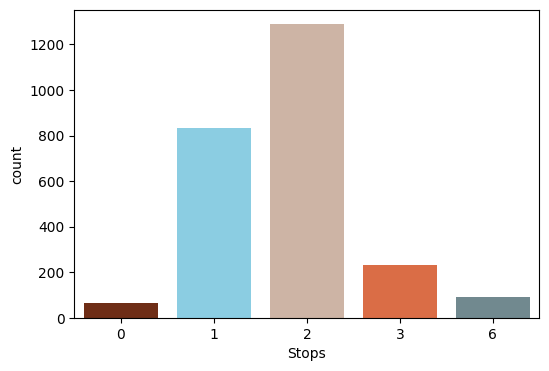

In [44]:
ax = plt.subplots(figsize=(6, 4))
ax = sns.countplot(x="Stops", data=data,palette=['#7d2607','#7cd4f1','#d3b39f','#f3612d','#6c8c94'] )
plt.show()

#### Interpretation


- The above plot confirms the findings that 
    - The most common occurrence is with 2 stops, followed by 1 stop.
    - There are very few counts for 0 stops and 6 stops.
    - A moderate count exists for 3 stops.

#### Check the number of unique values in `Cabin` variable

In [45]:
data['Cabin'].nunique()

4

#### View the unique values in `Cabin` variable

In [46]:
data['Cabin'].unique()

array(['Economy', 'Premium Economy', 'Business', 'First'], dtype=object)

#### Frequency distribution of `Cabin` variable

In [47]:
data['Cabin'].value_counts()

Cabin
Economy            1137
Business            797
Premium Economy     371
First               202
Name: count, dtype: int64

#### Visualize frequency distribution of `Cabin` variable

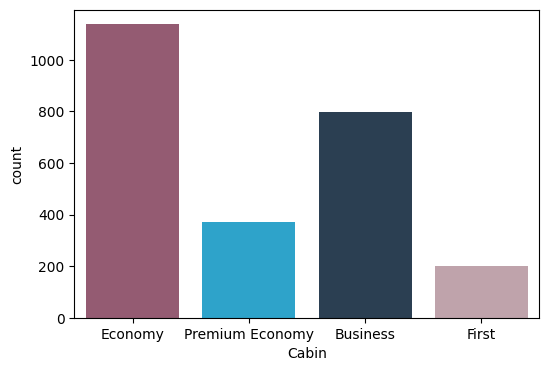

In [48]:
ax = plt.subplots(figsize=(6, 4))
ax = sns.countplot(x="Cabin", data=data,palette=['#9e5170','#14b0e4','#244058','#c49ea9'] )
plt.show()

#### Interpretation
Economy: Largest group, about 1000 passengers.

Premium Economy: Smaller group, around 200 passengers.

Business: Fewer passengers than Economy, about 800.

First Class: Smallest group, just over 200 passengers.

#### Seaborn Kernel Density Estimation (KDE) Plot


- The kernel density estimate (KDE) plot is a useful tool for plotting the shape of a distribution.

- The KDE plot plots the density of observations on one axis with height along the other axis.

- We can plot a KDE plot as follows :

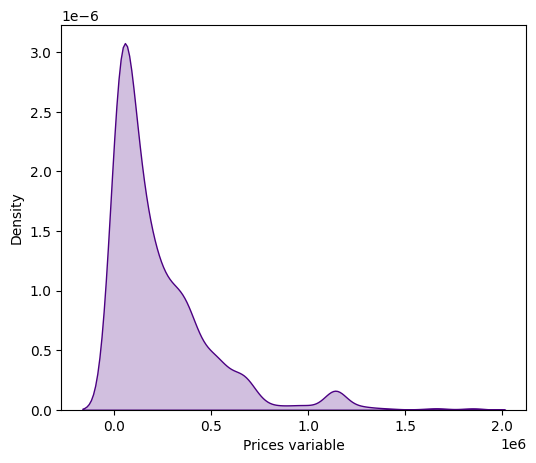

In [49]:
ax = plt.subplots(figsize=(6,5))
x = data['Prices']
x = pd.Series(x, name="Prices variable")
ax = sns.kdeplot(x, shade=True, color='indigo')
plt.show()

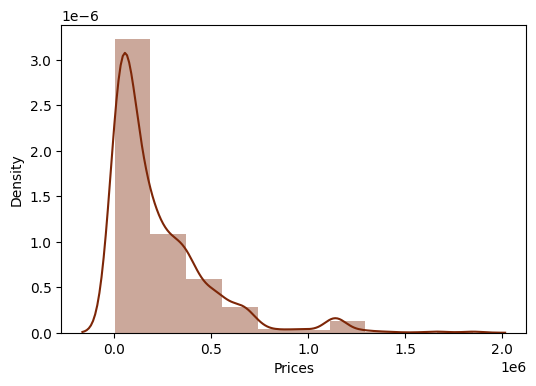

In [50]:
ax = plt.subplots(figsize=(6,4))
x = data['Prices']
ax = sns.distplot(x, bins=10,color='#7d2607')
plt.show()

### Interpretation:
The density plot illustrates a price distribution, with a noticeable peak at lower values, implying a concentration of data points around zero. As prices increase, density sharply declines, indicating fewer instances of higher prices in the dataset.


In [51]:
min_price = data['Prices'].min()
max_price = data['Prices'].max()
median_price = data['Prices'].median()

In [52]:
min_price

3208

In [53]:
max_price

1847785

In [54]:
median_price

133185.0

### Distributions of stops

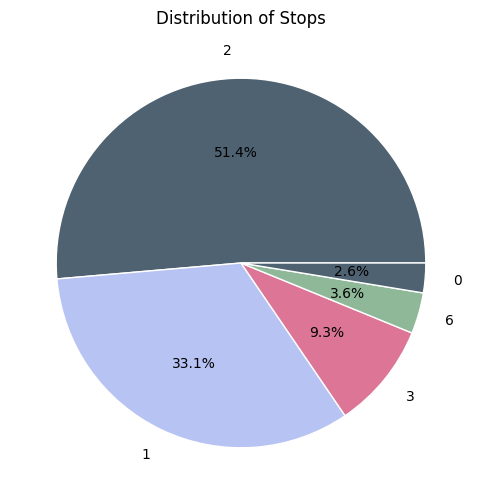

In [55]:

stops_distribution = data['Stops'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(stops_distribution, labels=stops_distribution.index,autopct='%1.1f%%', labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']);

plt.title('Distribution of Stops')
plt.show()


In [56]:
stops_distribution = data['Stops'].value_counts()


fig = px.pie(
    names=stops_distribution.index,
    values=stops_distribution.values,
    title='Distribution of Stops',
    color=stops_distribution.index,
    color_discrete_map={0: '#4F6272', 1: '#B7C3F3', 2: '#DD7596'},
    hole=0.4,  # Set a hole in the middle for a donut chart
)
#fig.write_html("Stops.html")
fig.show()

#### Interpretation:
The main point is that the pie chart illustrates the distribution of stops across five categories, with category "2" being the most common, followed by "1," "3," "6," and "0" in decreasing order of prevalence.

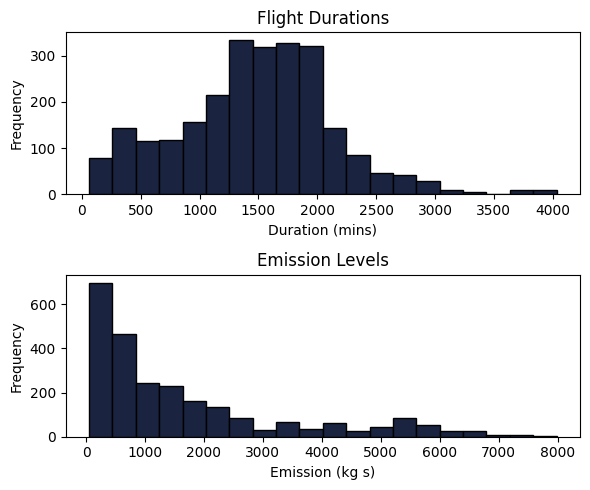

In [57]:
sns.set_palette("cubehelix")

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(6, 5))

# Flight durations
axs[0].hist(data['Flight_Durations'], bins=20, edgecolor='black')
axs[0].set_title('Flight Durations')
axs[0].set_xlabel('Duration (mins)')
axs[0].set_ylabel('Frequency')

# Emission levels
axs[1].hist(data['Emission(in kgs)'], bins=20, edgecolor='black')
axs[1].set_title('Emission Levels')
axs[1].set_xlabel('Emission (kg s)')
axs[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

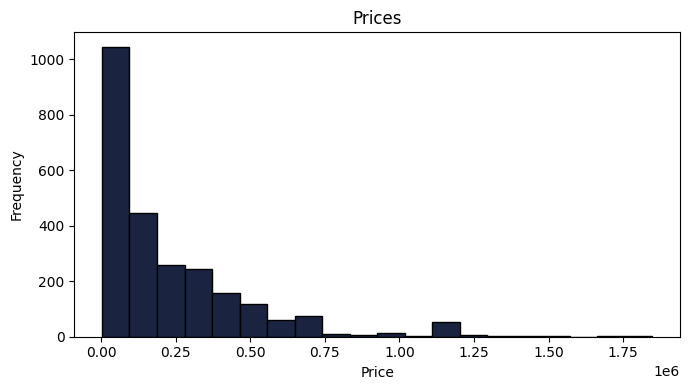

In [58]:
sns.set_palette("cubehelix")

# Create subplots
fig, axs = plt.subplots(1, 1, figsize=(7, 4))

# Prices
axs.hist(data['Prices'], bins=20, edgecolor='black')
axs.set_title('Prices')
axs.set_xlabel('Price')
axs.set_ylabel('Frequency')

plt.tight_layout()

plt.show()

#### Interpretation:
* Above three plots
* Most flights have durations around 1000 mins.
* The majority of flights fall within the range of 0 to around 2000 kg CO2
* Most flight prices are on the lower end.


In [59]:
fig = px.histogram(data, x='Prices', nbins=10, marginal='rug', color_discrete_sequence=['#4F6272'])
fig.update_layout(title='Distribution of Flight Prices', xaxis_title='Prices', yaxis_title='Frequency')
fig.show()
fig.write_html("FlightPrices.html")


In [60]:
airline_counts  = data['Airline'].value_counts()
airline_counts

Airline
Air India                                             599
IndiGo                                                146
Emirates                                               94
Air India, Lufthansa                                   87
Air India, Cathay Pacific                              71
                                                     ... 
Air India, British Airways, Air CanadaLufthansa         1
Singapore Airlines, United                              1
THAI, JAL, Air Canada                                   1
THAI, ANAOperated by Star Flyer                         1
THAI, UnitedOperated by Skywest DBA United Express      1
Name: count, Length: 232, dtype: int64

In [61]:
airline_counts.idxmax()

'Air India'

 **Comment**
 
 `Air India` is the most frequently occurring airline 

### Arrival Time Trends:
- Similarly, analyze the distribution of flights over different arrival hours.

In [62]:
x = data.groupby('Arrival_Hour').size().reset_index(name='Number of Flights')
x.sort_values(by='Number of Flights',ascending=False)

Arrival_Hour  Number of Flights
20            20                182
13            13                179
14            14                172
16            16                169
19            19                165
6              6                157
10            10                151
18            18                143
22            22                130
21            21                126
12            12                125
17            17                115
8              8                114
11            11                 93
15            15                 92
9              9                 87
7              7                 74
23            23                 60
0              0                 55
2              2                 43
5              5                 36
4              4                 21
1              1                  9
3              3                  9

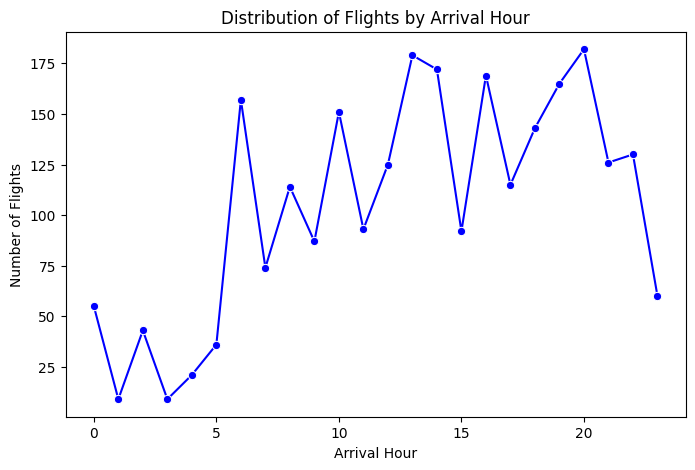

In [63]:
plt.figure(figsize=(8, 5))
#sns.set_style('dark',{'axes.facecolor':'black'})

sns.lineplot(x='Arrival_Hour', y='Number of Flights', data=x, marker='o', color='b')
plt.title('Distribution of Flights by Arrival Hour')
plt.xlabel('Arrival Hour')
plt.ylabel('Number of Flights')
plt.show()

### Interpretation:
* There are noticeable peaks in the number of flights around 10, 15, and just before 20 hours.
* Troughs occur at the beginning (0 hour), between hours 5 to almost 10, between hours 10 to 15, and a significant drop after hour 20.
* Overall, the graph indicates fluctuations in flight arrivals throughout the day. The busiest hours seem to be around mid-morning and mid-afternoon.



#### Departure Time Trends:


In [64]:

y = data.groupby('Departure_Hour').size().reset_index(name='Number of Flights')
y.sort_values(by='Number of Flights',ascending=False)

Departure_Hour  Number of Flights
1                1                283
10              10                250
21              21                244
20              20                225
22              22                183
16              16                145
14              14                142
6                6                117
3                3                115
17              17                115
4                4                109
13              13                103
8                8                 99
0                0                 78
23              23                 62
7                7                 47
11              11                 44
19              19                 37
15              15                 33
5                5                 32
18              18                 15
9                9                 12
12              12                 12
2                2                  5

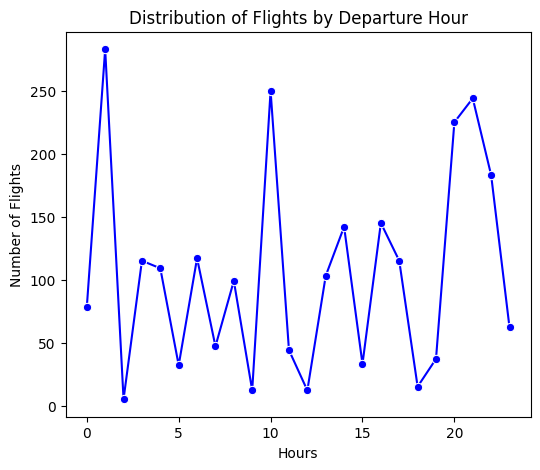

In [65]:
plt.figure(figsize=(6, 5))
#sns.set_style('dark',{'axes.facecolor':'black'})

sns.lineplot(x = 'Departure_Hour', y = "Number of Flights",data=y,marker='o', color='b')
plt.title('Distribution of Flights by Departure Hour')
plt.ylabel('Number of Flights') 
plt.xlabel('Hours') 
plt.show()

### Interpretation
* The highest departure flights occur around midnight (0 hours), mid-morning (around 10 hours), mid-afternoon (around 15 hours), and evening (around 20 hours).
* There are valleys indicating lower flights around early morning (around 5 hours) and late afternoon (around 17 hours).
* Overall, this graph provides insights into the patterns of departures throughout the day.

In [66]:
# Filter flights with specific criteria, for example, flights with stops
flights_with_stops = data[data['Stops'] > 0]
flights_with_stops

Airline    Cabin  \
0                                                IndiGo  Economy   
4                                                IndiGo  Economy   
5                                                IndiGo  Economy   
6                                                IndiGo  Economy   
7     IndiGoOperated by Operated Under Lease From Sm...  Economy   
...                                                 ...      ...   
2508                      Air India, Singapore Airlines    First   
2509                      Air India, Singapore Airlines    First   
2510                      Air India, Singapore Airlines    First   
2511                      Air India, Singapore Airlines    First   
2512                      Air India, Singapore Airlines    First   

     Departure Time Arrival_Time Departure Place Arrival_place  \
0           4:35 AM      9:45 AM             HYD           DEL   
4           1:50 AM      7:15 AM             HYD           DEL   
5          12:50 PM      6:15 PM             HYD           DEL   
6          10:50 PM      4:35 AM             HYD           DEL   
7          11:30 PM      5:20 AM             HYD           DEL   
...             ...          ...             ...           ...   
2508       10:30 PM      7:40 AM             HYD           SYD   
2509        5:05 PM      9:40 PM             HYD           SYD   
2510        1:20 PM      9:40 PM             HYD           SYD   
2511        2:10 PM      9:40 PM             HYD           SYD   
2512        4:25 PM      9:40 PM             HYD           SYD   

      Flight_Durations  Stops  Emission(in kgs)   Prices  Departure_Hour  \
0                  310      1               140     7690               4   
4                  325      1               140     7690               1   
5                  325      1               140     7690              12   
6                  345      1               149     7690              22   
7                  350      1               202     8294              23   
...                ...    ...               ...      ...             ...   
2508              1660      2              4074   814585              22   
2509              1385      2              5132   958892              17   
2510              1610      2              5162   978548              13   
2511              1560      2              5408  1010720              14   
2512              1425      2              5332  1010720              16   

      Arrival_Hour  
0                9  
4                7  
5               18  
6                4  
7                5  
...            ...  
2508             7  
2509            21  
2510            21  
2511            21  
2512            21  

[2442 rows x 12 columns]

In [67]:
len(flights_with_stops)

2442

In [68]:
flights_sorted_by_duration = data.sort_values(by='Flight_Durations', ascending=False)
flights_sorted_by_duration

Airline     Cabin  \
994   Qatar Airways, FlexFlightOperated by Deutsche ...   Economy   
987   Qatar Airways, FlexFlightOperated by Deutsche ...   Economy   
993   Qatar Airways, FlexFlightOperated by Deutsche ...   Economy   
963   IndiGo, Qatar Airways, FlexFlightOperated by D...   Economy   
992   Qatar Airways, FlexFlightOperated by Deutsche ...   Economy   
...                                                 ...       ...   
160                                              IndiGo   Economy   
1513                                          Air India  Business   
283                                              IndiGo   Economy   
158                                           Air India   Economy   
155                                              IndiGo   Economy   

     Departure Time Arrival_Time Departure Place Arrival_place  \
994         3:30 AM      6:14 PM             HYD           HBF   
987         3:30 AM      5:14 PM             HYD           HBF   
993         3:30 AM      5:14 PM             HYD           HBF   
963         3:40 AM      5:14 PM             HYD           HBF   
992         3:30 AM      4:14 PM             HYD           HBF   
...             ...          ...             ...           ...   
160         8:35 AM      9:45 AM             HYD           BLR   
1513        9:10 PM     10:20 PM             HYD           BLR   
283         5:45 AM      6:55 AM             HYD           GOI   
158         9:10 PM     10:20 PM             HYD           BLR   
155        10:35 PM     11:35 PM             HYD           BLR   

      Flight_Durations  Stops  Emission(in kgs)  Prices  Departure_Hour  \
994               4034      6               671   89743               3   
987               3974      6               562   74203               3   
993               3974      6               671   89743               3   
963               3964      6               502   64538               3   
992               3914      6               671   89743               3   
...                ...    ...               ...     ...             ...   
160                 70      0                49    3751               8   
1513                70      0               256   16407              21   
283                 70      0                55    5156               5   
158                 70      0                64    3520              21   
155                 60      0                50    3331              22   

      Arrival_Hour  
994             18  
987             17  
993             17  
963             17  
992             16  
...            ...  
160              9  
1513            22  
283              6  
158             22  
155             23  

[2507 rows x 12 columns]

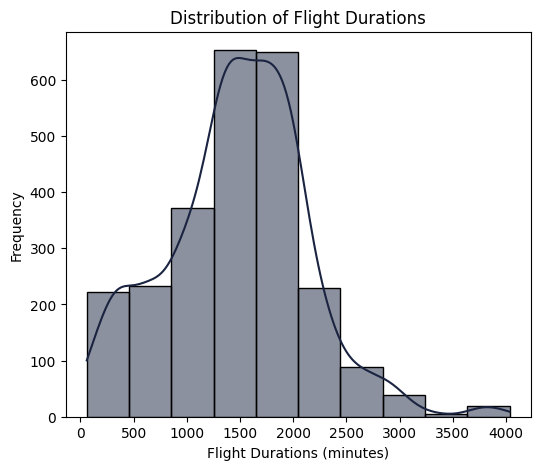

In [69]:
plt.figure(figsize=(6, 5))
sns.histplot(data['Flight_Durations'], bins=10, kde=True)
plt.title('Distribution of Flight Durations')
plt.xlabel('Flight Durations (minutes)')
plt.ylabel('Frequency')
plt.show()


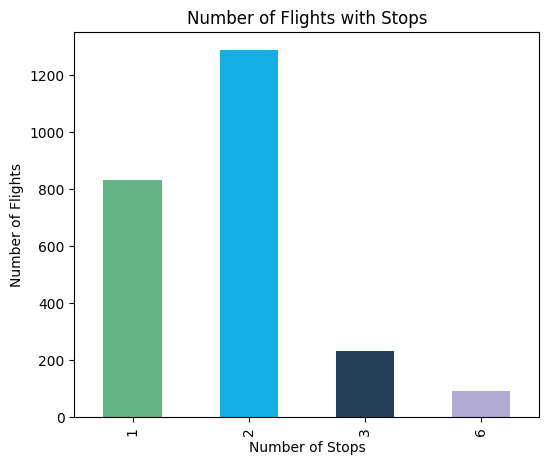

In [70]:
flights_with_stops = data[data['Stops'] > 0]

plt.figure(figsize=(6, 5))
flights_with_stops['Stops'].value_counts().sort_index().plot(kind='bar', color=['#64b384','#14b0e4','#244058','#b1aad2'])
plt.title('Number of Flights with Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Number of Flights')
plt.show()

## 8. Bivariate Analysis <a class="anchor" id="8"></a>


[Back to Table of Contents](#0.1)

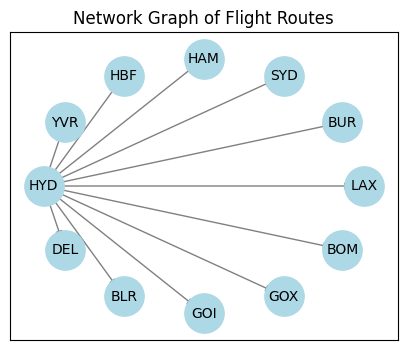

In [71]:
G = nx.from_pandas_edgelist(data, source='Departure Place', target='Arrival_place', create_using=nx.DiGraph())

# Network graph visualization
plt.figure(figsize=(5, 4))

# Adjust the layout to a Kamada-Kawai arrangement
pos = nx.shell_layout(G)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=800)

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color='gray')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

plt.title('Network Graph of Flight Routes')
plt.show()


### Estimate correlation coefficients <a class="anchor" id="8.1"></a>

Our dataset is very small. So, I will compute the standard correlation coefficient (also called Pearson's r) between every pair of attributes. I will compute it using the `df.corr()` method as follows:-

* Analyze the correlation between emission levels and flight parameters such as stops, cabin class, and departure times.

In [72]:
correlation_matrix = data[['Stops', 'Emission(in kgs)', 'Departure_Hour']].corr()
correlation_matrix

Stops  Emission(in kgs)  Departure_Hour
Stops             1.000000          0.126744       -0.135548
Emission(in kgs)  0.126744          1.000000       -0.112310
Departure_Hour   -0.135548         -0.112310        1.000000

In [73]:
average_stats_by_airline = data.groupby('Airline').agg({'Emission(in kgs)': 'mean', 'Prices': 'mean'})
average_stats_by_airline


Emission(in kgs)  \
Airline                                                                
Air India                                                 844.277129   
Air India Express, Air India                              349.333333   
Air India ExpressAir India                                107.750000   
Air India, ANA, American                                 1572.000000   
Air India, Air Canada                                    3108.156863   
...                                                              ...   
Vistara, SWISSOperated by Helvetic                       1113.000000   
Vistara, UnitedOperated by Skywest DBA United E...       1484.000000   
flydubai, Emirates                                       2639.000000   
flydubai, Emirates, AlaskaOperated by Horizon A...       5535.000000   
flydubai, Emirates, United                               5721.000000   

                                                           Prices  
Airline                                                            
Air India                                           121749.767947  
Air India Express, Air India                         45524.555556  
Air India ExpressAir India                           16547.250000  
Air India, ANA, American                            321157.000000  
Air India, Air Canada                               455645.352941  
...                                                           ...  
Vistara, SWISSOperated by Helvetic                  209620.333333  
Vistara, UnitedOperated by Skywest DBA United E...  211819.000000  
flydubai, Emirates                                  329925.333333  
flydubai, Emirates, AlaskaOperated by Horizon A...  635351.000000  
flydubai, Emirates, United                          630726.000000  

[232 rows x 2 columns]

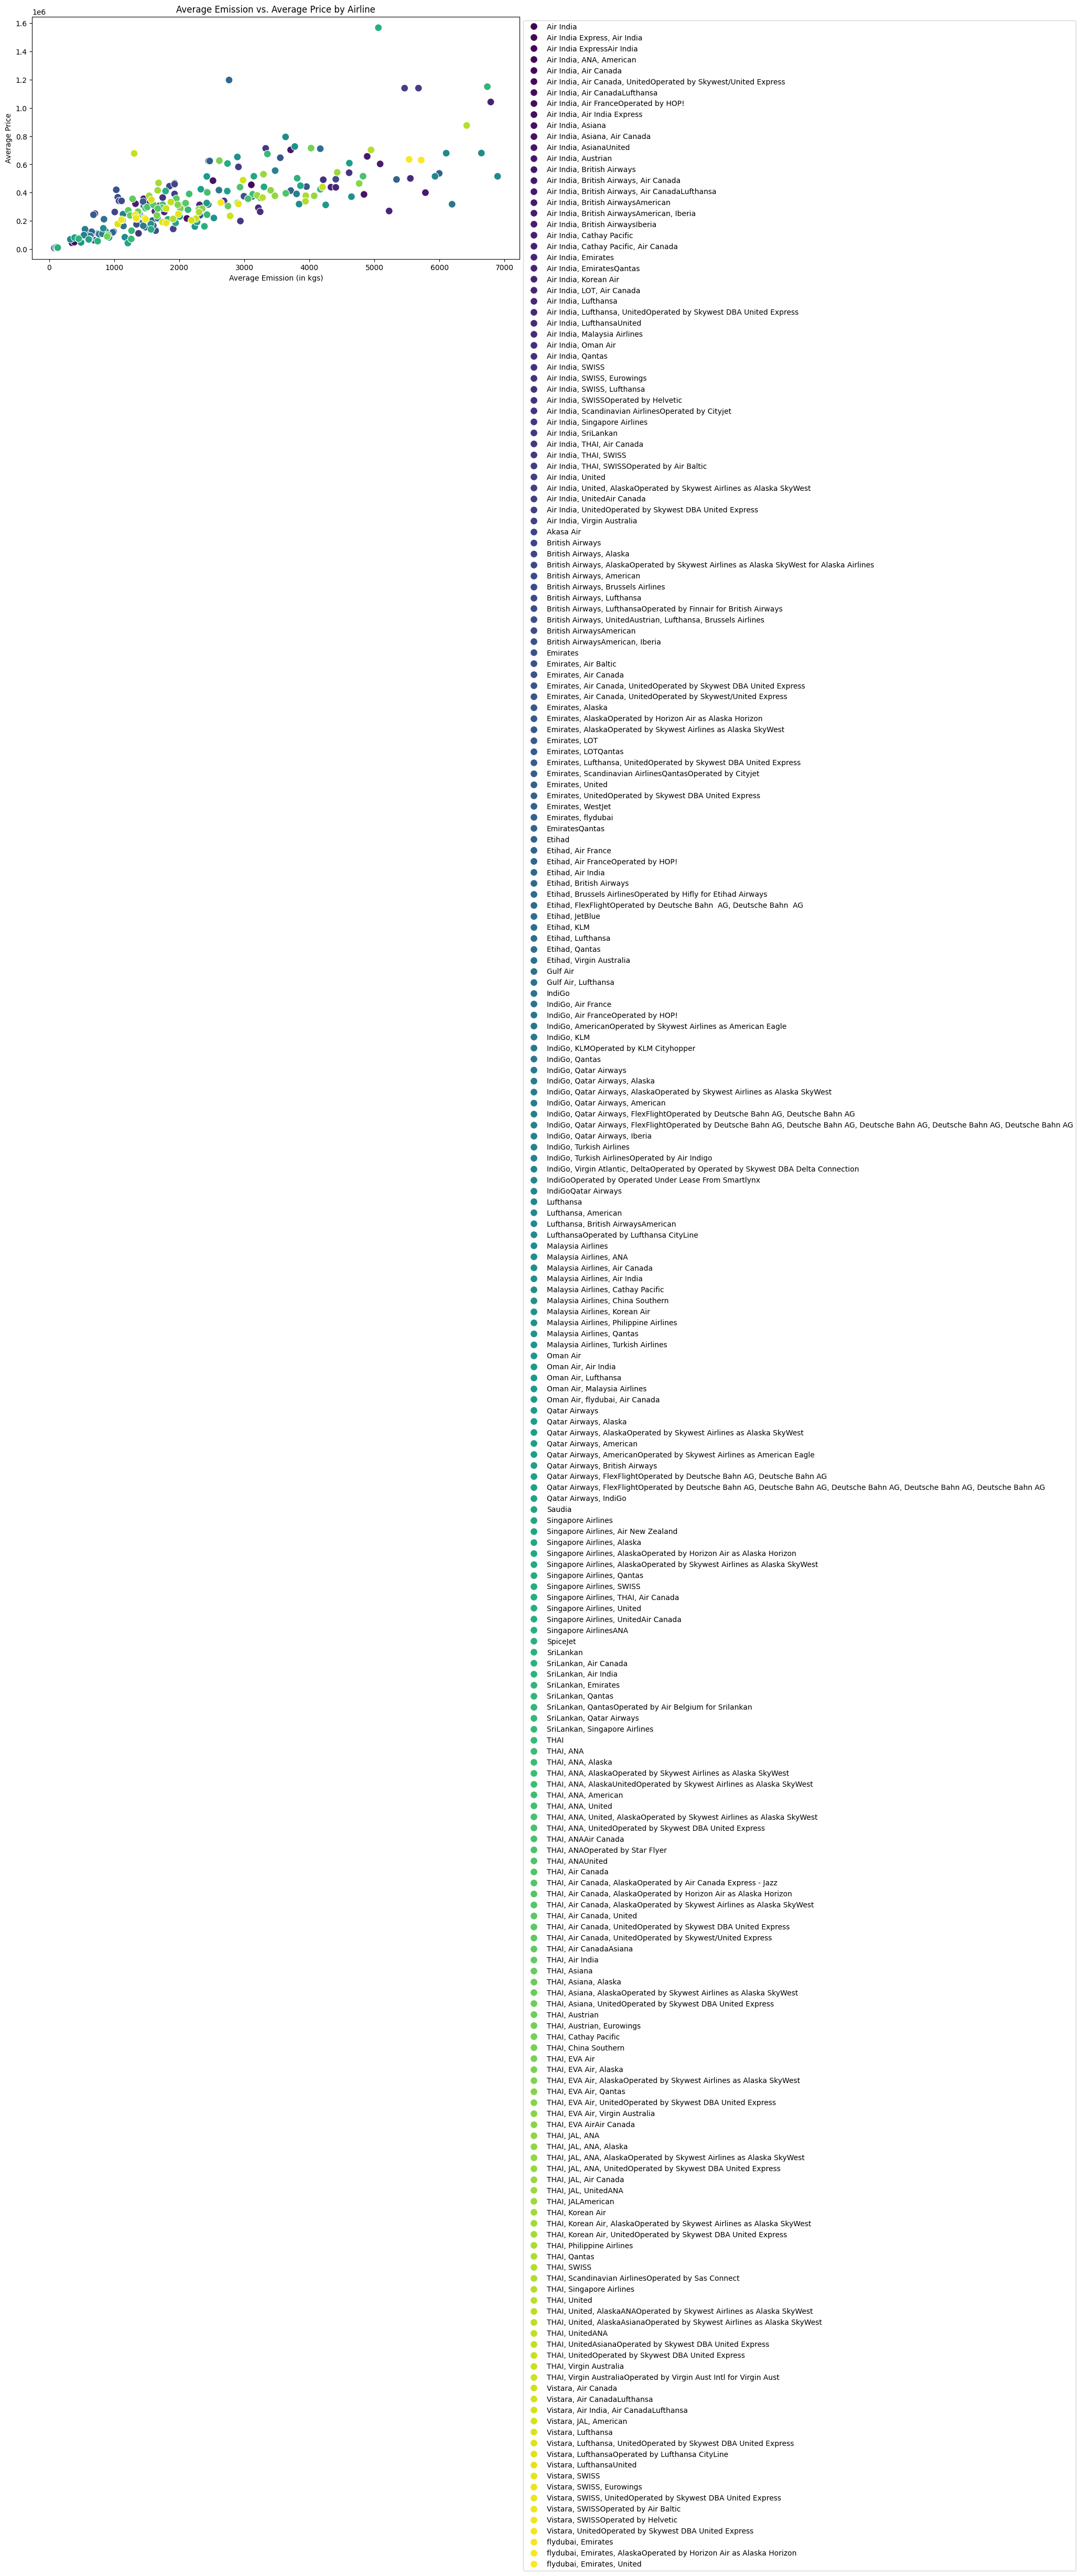

In [74]:
average_stats_by_airline = data.groupby('Airline').agg({'Emission(in kgs)': 'mean', 'Prices': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Emission(in kgs)', y='Prices', data=average_stats_by_airline, hue='Airline', s=100, palette='viridis')
plt.title('Average Emission vs. Average Price by Airline')
plt.xlabel('Average Emission (in kgs)')
plt.ylabel('Average Price')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

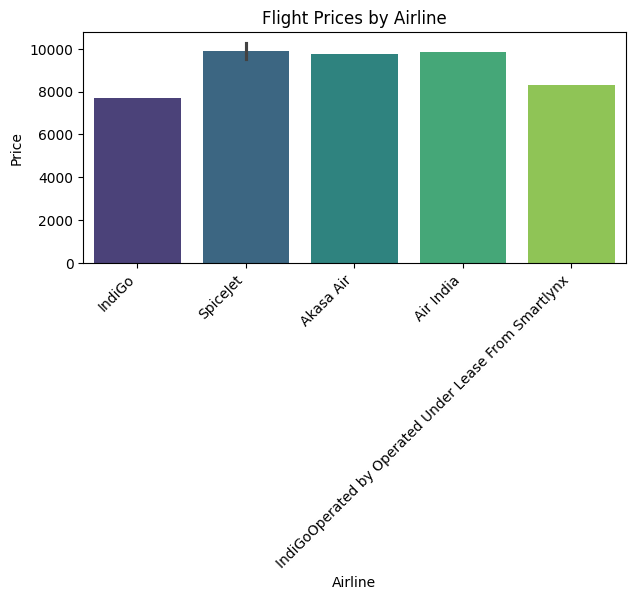

In [75]:
a=data['Airline'].head(10)

plt.figure(figsize=(7, 3))
sns.barplot(x=a, y='Prices', data=data, palette='viridis')
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

#### top 10 airlines with the highest counts of flights having one stop

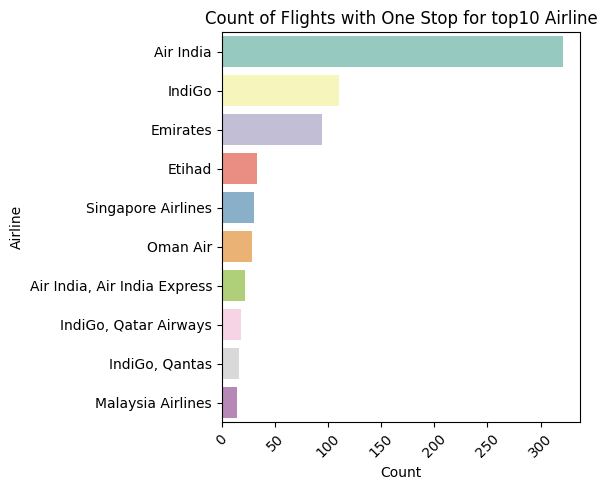

In [76]:
a = data[data['Stops'] == 1].groupby('Airline')['Stops'].value_counts().reset_index(name='Count')
a = a.sort_values(by='Count', ascending=False).head(10)
f,ax = plt.subplots(figsize=(6, 5))
sns.barplot(y='Airline', x='Count', data=a, palette='Set3')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,)

plt.title("Count of Flights with One Stop for top10 Airline")
plt.ylabel("Airline")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

#### Interpretation:
* we can conclude that Air India operates the highest number of one-stop flights among the top 10 airlines. IndiGo and Emirates follow closely in terms of one-stop flight counts.

#### top  airlines with the highest counts of flights having zero stop

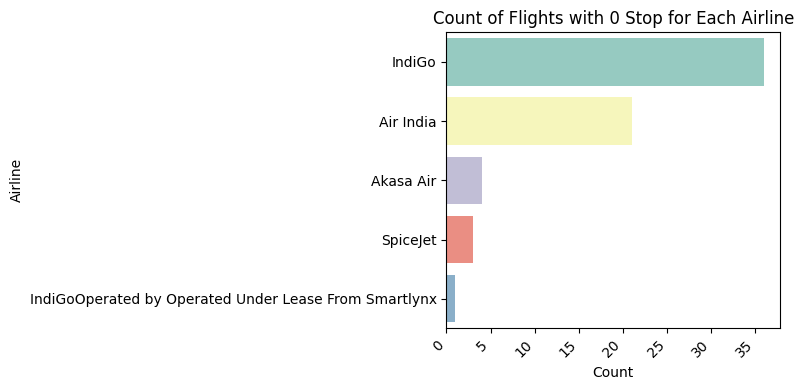

In [77]:

b = data[data['Stops'] == 0].groupby('Airline')['Stops'].value_counts().reset_index(name='Count')

b = b.sort_values(by='Count', ascending=False)

f, ax = plt.subplots(figsize=(8, 4))
sns.barplot(y='Airline', x='Count', data=b, palette='Set3')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.title("Count of Flights with 0 Stop for Each Airline")
plt.ylabel("Airline")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

### Interpretation:
* IndiGo has the highest number of non-stop flights, followed by Air India, Akasa Air, and SpiceJet etc. 

#### top 10 airlines with the highest counts of flights having two stops,

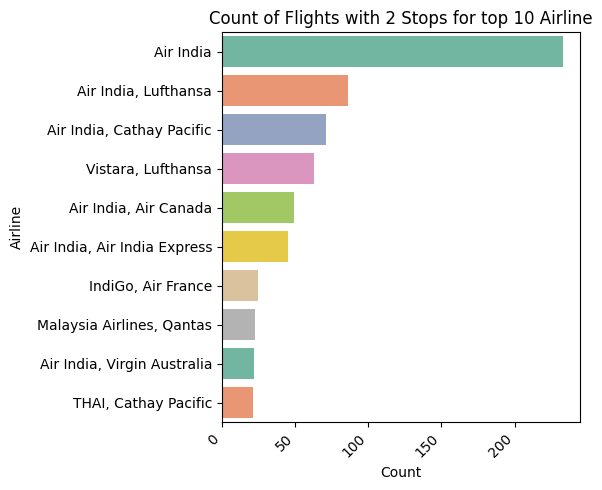

In [78]:
e = data[data['Stops'] == 2].groupby('Airline')['Stops'].value_counts().reset_index(name='Count')

e = e.sort_values(by='Count', ascending=False).head(10)

f, ax = plt.subplots(figsize=(6, 5))
sns.barplot(y='Airline', x='Count', data=e, palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.title("Count of Flights with 2 Stops for top 10 Airline")
plt.ylabel("Airline")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

 ### Interpretation:
* Air India appears frequently in various combinations, and the Air India-Lufthansa duo has the highest count.
* Other notable pairs include Air India with Cathay Pacific, Vistara with Lufthansa, and IndiGo with Air France.
* Overall, Air India plays a significant role in multi-stop journeys.
 🛫✈️

#### top  airlines with the highest counts of flights having six stops

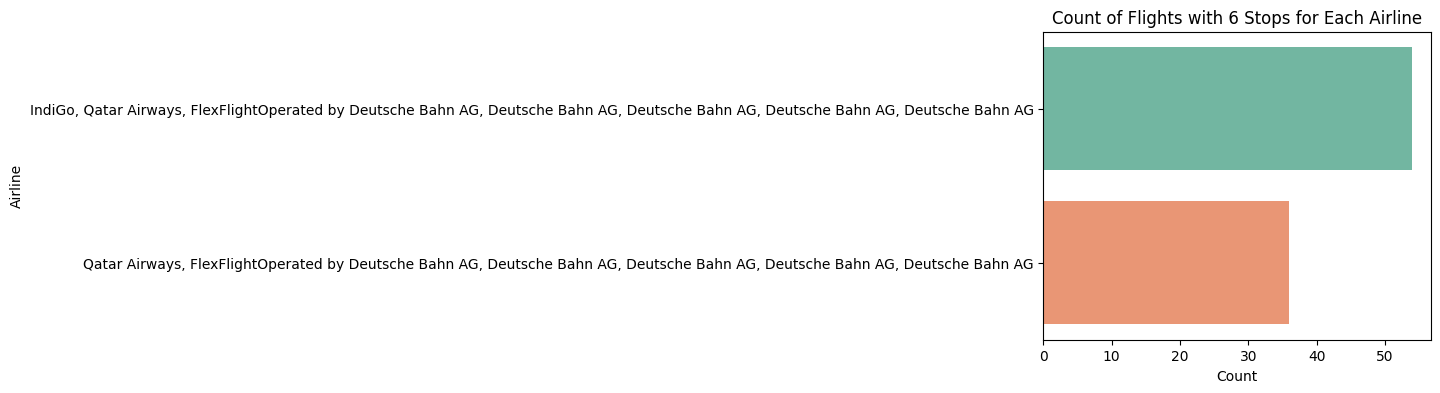

In [79]:
c = data[data['Stops'] == 6].groupby('Airline')['Stops'].value_counts().reset_index(name='Count')
c = c.sort_values(by='Count', ascending=False)


f, ax = plt.subplots(figsize=(5, 4))
sns.barplot(y='Airline', x='Count', data=c, palette='Set2')
ax.set_xticklabels(ax.get_xticklabels())

plt.title("Count of Flights with 6 Stops for Each Airline")
plt.ylabel("Airline")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

#### top 10 airlines with the highest counts of flights having Three stops

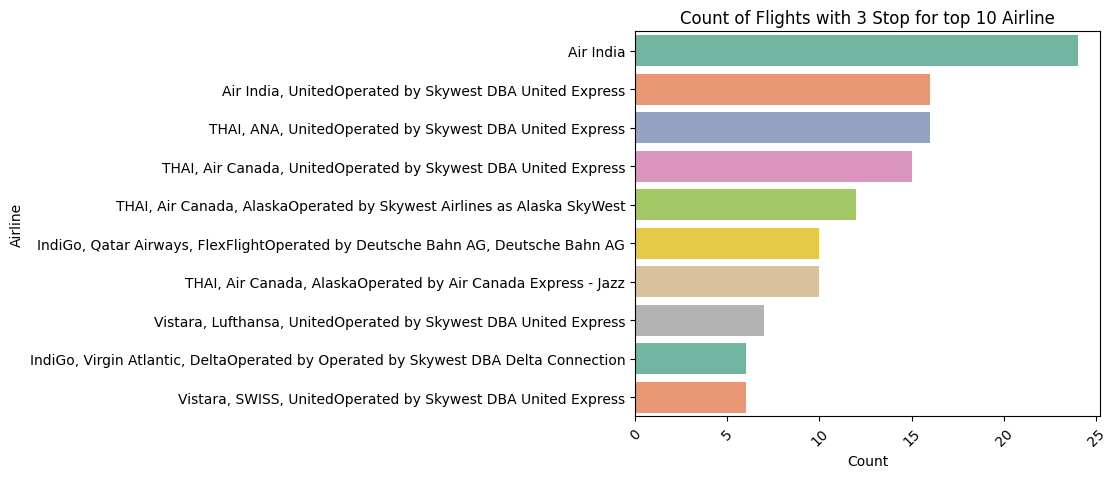

In [80]:
d = data[data['Stops'] == 3].groupby('Airline')['Stops'].value_counts().reset_index(name='Count')
d = d.sort_values(by='Count', ascending=False).head(10)


f, ax = plt.subplots(figsize=(6, 5))
sns.barplot(y='Airline', x='Count', data=d, palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.title("Count of Flights with 3 Stop for top 10 Airline")
plt.ylabel("Airline")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

#### Interpretation:
Air India, United (Operated by Skywest DBA United Express), THAI and ANA, THAI, Air Canada, and United (Operated by Skywest DBA United Express). These airlines have the highest count of flights with 3 stops. 🛫✈️

In [81]:
direct_flights = data[data['Stops'] == 0]
direct_flights

Airline     Cabin Departure Time Arrival_Time Departure Place  \
1      SpiceJet   Economy        6:05 AM      8:15 AM             HYD   
2     Akasa Air   Economy        8:10 AM     10:40 AM             HYD   
3     Air India   Economy        6:15 AM      8:35 AM             HYD   
8     Air India   Economy        2:10 PM      4:25 PM             HYD   
9      SpiceJet   Economy        2:40 PM      5:00 PM             HYD   
...         ...       ...            ...          ...             ...   
1627  Air India  Business        4:25 PM      7:00 PM             HYD   
1801  Air India  Business        8:20 AM     10:10 AM             HYD   
1802  Air India  Business        1:20 PM      3:10 PM             HYD   
1803  Air India  Business       10:30 PM     12:10 AM             HYD   
2354  Air India     First        8:40 PM     11:00 PM             HYD   

     Arrival_place  Flight_Durations  Stops  Emission(in kgs)  Prices  \
1              DEL               130      0               155    9538   
2              DEL               150      0               105    9745   
3              DEL               140      0               104    9830   
8              DEL               135      0               104    9830   
9              DEL               140      0                97   10272   
...            ...               ...    ...               ...     ...   
1627           DEL               155      0               156   49973   
1801           BOM               110      0               131   18557   
1802           BOM               110      0                88   18557   
1803           BOM               100      0               131   18557   
2354           DEL               140      0               737   58709   

      Departure_Hour  Arrival_Hour  
1                  6             8  
2                  8            10  
3                  6             8  
8                 14            16  
9                 14            17  
...              ...           ...  
1627              16            19  
1801               8            10  
1802              13            15  
1803              22             0  
2354              20            23  

[65 rows x 12 columns]

In [82]:
len(direct_flights)

65

#### comment:
There are 65 instances of direct flights 

In [83]:
flights_with_stops = data[data['Stops'] > 0]
flights_with_stops

Airline    Cabin  \
0                                                IndiGo  Economy   
4                                                IndiGo  Economy   
5                                                IndiGo  Economy   
6                                                IndiGo  Economy   
7     IndiGoOperated by Operated Under Lease From Sm...  Economy   
...                                                 ...      ...   
2508                      Air India, Singapore Airlines    First   
2509                      Air India, Singapore Airlines    First   
2510                      Air India, Singapore Airlines    First   
2511                      Air India, Singapore Airlines    First   
2512                      Air India, Singapore Airlines    First   

     Departure Time Arrival_Time Departure Place Arrival_place  \
0           4:35 AM      9:45 AM             HYD           DEL   
4           1:50 AM      7:15 AM             HYD           DEL   
5          12:50 PM      6:15 PM             HYD           DEL   
6          10:50 PM      4:35 AM             HYD           DEL   
7          11:30 PM      5:20 AM             HYD           DEL   
...             ...          ...             ...           ...   
2508       10:30 PM      7:40 AM             HYD           SYD   
2509        5:05 PM      9:40 PM             HYD           SYD   
2510        1:20 PM      9:40 PM             HYD           SYD   
2511        2:10 PM      9:40 PM             HYD           SYD   
2512        4:25 PM      9:40 PM             HYD           SYD   

      Flight_Durations  Stops  Emission(in kgs)   Prices  Departure_Hour  \
0                  310      1               140     7690               4   
4                  325      1               140     7690               1   
5                  325      1               140     7690              12   
6                  345      1               149     7690              22   
7                  350      1               202     8294              23   
...                ...    ...               ...      ...             ...   
2508              1660      2              4074   814585              22   
2509              1385      2              5132   958892              17   
2510              1610      2              5162   978548              13   
2511              1560      2              5408  1010720              14   
2512              1425      2              5332  1010720              16   

      Arrival_Hour  
0                9  
4                7  
5               18  
6                4  
7                5  
...            ...  
2508             7  
2509            21  
2510            21  
2511            21  
2512            21  

[2442 rows x 12 columns]

#### comment:
* flights from the dataset involving stops (more than 0), total 2442 instance

In [84]:
cabin_grouped = data.groupby('Cabin')['Prices']

In [85]:
cabin_grouped.describe()

count           mean            std      min       25%  \
Cabin                                                                      
Business          797.0  283508.015056  271498.124621  16407.0   64713.0   
Economy          1137.0  102308.924362  110121.964826   3208.0   18766.0   
First             202.0  639544.896040  450248.459917  58361.0  175924.0   
Premium Economy   371.0  289034.094340  135292.800318  10773.0  177042.0   

                      50%        75%        max  
Cabin                                            
Business         189698.0   439077.0  1847785.0  
Economy           64321.0   148499.0   677506.0  
First            581818.0  1137221.0  1666256.0  
Premium Economy  319542.0   373287.5   871283.0

* The analysis of cabin-wise prices reveals a diverse range across classes. 
* Business class exhibits the highest mean price of 283,508, with prices ranging from 16,407 to a maximum of 1,847,785.
* Economy class shows a more modest mean of 102,309, varying between 3,208 and 677,506. 
* First class boasts a mean price of 639,545, with a range from 58,361 to 1,666,256. Premium Economy, with a mean of 289,034, spans from 10,773 to 871,283.

**Affordability: Consideration of ticket prices and associated costs, ensuring that travelers are presented with budget-friendly options.**

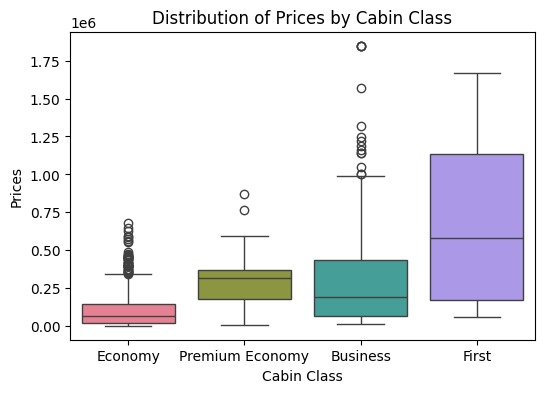

In [86]:
# Visualize the distribution of prices for each cabin class using a boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='Cabin', y='Prices', data=data,palette='husl')
plt.title('Distribution of Prices by Cabin Class')
plt.xlabel('Cabin Class')
plt.ylabel('Prices')
plt.show()

### Interpretation:

**First Class:**

Median Price: Approximately 1,000,000 .

Price Range (IQR): Roughly between 800,000 and 1,200,000.

**Business Class:**

Median Price: Around 500,000 .

Price Range (IQR): Approximately between 400,000 and 600,000.

**Premium Economy:**

Median Price: Approximately 200,000 .

Price Range (IQR): Roughly between 150,000 and 250,000.

**Economy Class:**

Median Price: Approximately 50,000.

Price Range (IQR): Approximately between 30,000 and 70,000.


**First Class exhibiting the highest median around 1,000,000, followed by Business, Premium Economy, and Economy classes.**

In [87]:
#summarizing mean, minimum, and maximum prices for different airlines in the 'data' 
price_summary = data.groupby('Cabin').agg({'Prices': ['mean', 'min', 'max']})
price_summary


Prices                
                          mean    min      max
Cabin                                         
Business         283508.015056  16407  1847785
Economy          102308.924362   3208   677506
First            639544.896040  58361  1666256
Premium Economy  289034.094340  10773   871283

In [88]:
price_summary.idxmax()

Prices  mean       First
        min        First
        max     Business
dtype: object

**comment**


* First Class has the highest avg price at approximately 639,545.

* First Class exhibits the highest maximum price at 1,666,256.

* Business Class has the lowest minimum price at 16,407, but the highest maximum price at 1,847,785.

In [89]:
#summarizing mean, minimum, and maximum prices for different airlines in the 'data'
price_summarys = data.groupby(['Airline','Cabin']).agg({'Prices': ['mean', 'min', 'max']})
d= price_summarys.sort_values(('Prices', 'mean'), ascending=False)
d

Prices  \
                                                                     mean   
Airline                                            Cabin                    
Etihad, British Airways                            Business  1.847785e+06   
THAI, Cathay Pacific                               First     1.664980e+06   
Singapore Airlines, UnitedAir Canada               Business  1.566835e+06   
Malaysia Airlines, Cathay Pacific                  First     1.415623e+06   
Air India, British Airways                         First     1.272287e+06   
...                                                                   ...   
Air India ExpressAir India                         Economy   1.654725e+04   
IndiGo                                             Economy   1.267316e+04   
SpiceJet                                           Economy   1.114383e+04   
IndiGoOperated by Operated Under Lease From Sma... Economy   9.202750e+03   
Akasa Air                                          Economy   9.095250e+03   

                                                                               
                                                                 min      max  
Airline                                            Cabin                       
Etihad, British Airways                            Business  1847785  1847785  
THAI, Cathay Pacific                               First     1664555  1666256  
Singapore Airlines, UnitedAir Canada               Business  1566835  1566835  
Malaysia Airlines, Cathay Pacific                  First     1415623  1415623  
Air India, British Airways                         First     1272287  1272287  
...                                                              ...      ...  
Air India ExpressAir India                         Economy     12124    29344  
IndiGo                                             Economy      3208    32046  
SpiceJet                                           Economy      6403    14270  
IndiGoOperated by Operated Under Lease From Sma... Economy      3646    17069  
Akasa Air                                          Economy      3516    18997  

[422 rows x 3 columns]

In [90]:
d.idxmax()

Prices  mean    (Etihad, British Airways, Business)
        min     (Etihad, British Airways, Business)
        max     (Etihad, British Airways, Business)
dtype: object

### comment
average, minimum, and maximum prices for various combinations of airlines and cabin classes, identifying ('Etihad', 'British Airways', 'Business') as the category with the highest price

**Identify airlines that demonstrate a commitment to sustainability by offering lower-emission flights**

In [91]:
average_emission_by_airline = data.groupby('Airline')['Emission(in kgs)'].mean()
# Sort airlines based on average emission in ascending order
sorted_airlines = average_emission_by_airline.sort_values()
sorted_airlines

Airline
Akasa Air                                                  79.250000
IndiGo                                                    103.349315
Air India ExpressAir India                                107.750000
IndiGoOperated by Operated Under Lease From Smartlynx     123.375000
SpiceJet                                                  130.666667
                                                            ...     
THAI, United                                             6420.000000
LufthansaOperated by Lufthansa CityLine                  6646.000000
SriLankan, Emirates                                      6737.500000
Air India, Emirates                                      6790.000000
Lufthansa, American                                      6895.000000
Name: Emission(in kgs), Length: 232, dtype: float64

In [92]:
#  top 5 airlines with the lowest average emissions
top_low_emission_airlines = sorted_airlines.head(5)
print("Top 5 Airlines with the Lowest Average Emissions:")
top_low_emission_airlines

Top 5 Airlines with the Lowest Average Emissions:


Airline
Akasa Air                                                 79.250000
IndiGo                                                   103.349315
Air India ExpressAir India                               107.750000
IndiGoOperated by Operated Under Lease From Smartlynx    123.375000
SpiceJet                                                 130.666667
Name: Emission(in kgs), dtype: float64

**Consider Off-Peak Travel:**

Suggest flights during off-peak hours when air traffic is lower. This may contribute to a more efficient use of airspace and potentially reduce emissions.

In [93]:
# off-peak departure hours (e.g., before 7 AM or after 8 PM)
off_peak_flights = data[(data['Departure_Hour'] < 7) | (data['Departure_Hour'] >= 20)]

sorted_off_peak_flights = off_peak_flights.sort_values(by='Departure_Hour')

sorted_off_peak_flights

Airline     Cabin  \
1997                                  Malaysia Airlines  Business   
1632                                  Malaysia Airlines  Business   
672              Malaysia Airlines, Philippine Airlines   Economy   
673              Malaysia Airlines, Philippine Airlines   Economy   
2243             Malaysia Airlines, Philippine Airlines  Business   
...                                                 ...       ...   
770                          Singapore Airlines, Alaska   Economy   
750   Singapore Airlines, AlaskaOperated by Skywest ...   Economy   
1658                                 Singapore Airlines  Business   
772                          Singapore Airlines, Alaska   Economy   
2306               Singapore Airlines, UnitedAir Canada  Business   

     Departure Time Arrival_Time Departure Place Arrival_place  \
1997       12:30 AM      8:35 PM             HYD           SYD   
1632       12:30 AM     12:20 PM             HYD           DEL   
672        12:30 AM      7:00 PM             HYD           LAX   
673        12:30 AM      7:00 PM             HYD           LAX   
2243       12:30 AM      3:55 PM             HYD           YVR   
...             ...          ...             ...           ...   
770        11:10 PM      9:59 PM             HYD           BUR   
750        11:10 PM      8:14 PM             HYD           LAX   
1658       11:10 PM      8:00 PM             HYD           DEL   
772        11:10 PM      6:35 PM             HYD           BUR   
2306       11:10 PM      9:18 PM             HYD           YVR   

      Flight_Durations  Stops  Emission(in kgs)   Prices  Departure_Hour  \
1997               875      1              2402   182158               0   
1632               710      1               887    67035               0   
672               1920      2              1561   236786               0   
673               1920      2              1540   236786               0   
2243              1735      2              4028   458347               0   
...                ...    ...               ...      ...             ...   
770               2179      2              1525   441842              23   
750               2074      2              5029   354283              23   
1658              1250      1              2466   192671              23   
772               1975      2              1504   445901              23   
2306              2138      2              5062  1566835              23   

      Arrival_Hour  
1997            20  
1632            12  
672             19  
673             19  
2243            15  
...            ...  
770             21  
750             20  
1658            20  
772             18  
2306            21  

[1453 rows x 12 columns]

**Compare Emission Levels:**

In [94]:
emission_data = data[['Airline', 'Emission(in kgs)']]

emission_data

Airline  Emission(in kgs)
0                            IndiGo               140
1                          SpiceJet               155
2                         Akasa Air               105
3                         Air India               104
4                            IndiGo               140
...                             ...               ...
2508  Air India, Singapore Airlines              4074
2509  Air India, Singapore Airlines              5132
2510  Air India, Singapore Airlines              5162
2511  Air India, Singapore Airlines              5408
2512  Air India, Singapore Airlines              5332

[2507 rows x 2 columns]

In [95]:
average_emissions = emission_data.groupby('Airline').mean()

sorted_emissions = average_emissions.sort_values(by='Emission(in kgs)')

sorted_emissions


Emission(in kgs)
Airline                                                             
Akasa Air                                                  79.250000
IndiGo                                                    103.349315
Air India ExpressAir India                                107.750000
IndiGoOperated by Operated Under Lease From Sma...        123.375000
SpiceJet                                                  130.666667
...                                                              ...
THAI, United                                             6420.000000
LufthansaOperated by Lufthansa CityLine                  6646.000000
SriLankan, Emirates                                      6737.500000
Air India, Emirates                                      6790.000000
Lufthansa, American                                      6895.000000

[232 rows x 1 columns]

**Evaluate Total Journey Time:**

While direct flights may have lower emissions, consider the overall journey time. Sometimes, a slightly longer direct flight may be more convenient than a shorter flight with layovers.

In [96]:
data['Emission_Time_Ratio'] = data['Emission(in kgs)'] / data['Flight_Durations']

In [97]:
sorted_df = data.sort_values(by='Emission_Time_Ratio')
sorted_df[['Airline', 'Flight_Durations', 'Stops', 'Emission(in kgs)', 'Emission_Time_Ratio']]

Airline  Flight_Durations  Stops  Emission(in kgs)  \
382     Air India ExpressAir India              1580      1               113   
370   Air India, Air India Express              1580      1               118   
322                      Air India              1625      1               124   
193                      Air India              2040      1               166   
341                      Air India              1525      1               127   
...                            ...               ...    ...               ...   
1891            Singapore Airlines              1535      2              7395   
2499                      Emirates              1280      1              6344   
1981      THAI, Singapore Airlines              1395      2              6922   
2354                     Air India               140      0               737   
2497                      Emirates              1180      1              6344   

      Emission_Time_Ratio  
382              0.071519  
370              0.074684  
322              0.076308  
193              0.081373  
341              0.083279  
...                   ...  
1891             4.817590  
2499             4.956250  
1981             4.962007  
2354             5.264286  
2497             5.376271  

[2507 rows x 5 columns]

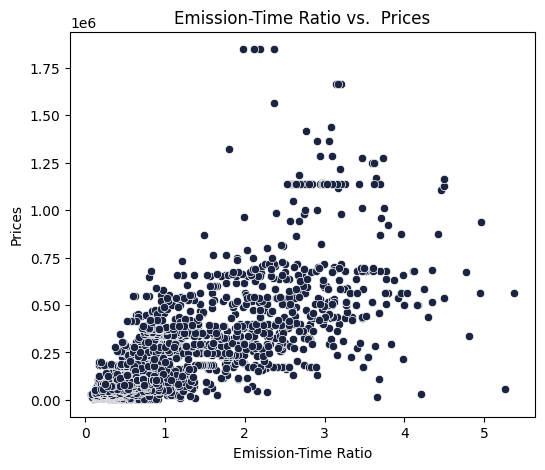

In [98]:
# Emission-Time Ratio vs. Affordability
plt.figure(figsize=(6, 5))
sns.scatterplot(x='Emission_Time_Ratio', y='Prices', data=data,palette='Greys')
plt.title('Emission-Time Ratio vs.  Prices')
plt.xlabel('Emission-Time Ratio')
plt.ylabel('Prices')
plt.show()

### Interpretation
Lower emission-time ratio indicates greener travel.

Negative correlation: Eco-friendly options tend to be pricier.

Price variation hints at factors beyond eco-friendliness, like demand and quality.

**Consider Alternative Transportation:**

Suggest alternative transportation modes, such as trains or buses, for shorter distances. These modes of transport can be more environmentally friendly for certain routes.

In [99]:
#  flights with short durations, e.g., less than 4 hours (adjust as needed)
sorted_short_flights = data[data['Flight_Durations'] < 240].sort_values(by='Emission(in kgs)')

sorted_short_flights[['Airline', 'Flight_Durations', 'Stops', 'Emission(in kgs)', 'Prices']]


Airline  Flight_Durations  Stops  Emission(in kgs)  Prices
189      IndiGo                80      0                49   10209
436   Air India                85      0                49    4003
428   Air India               110      0                49    3688
287    SpiceJet                95      0                49    6403
161      IndiGo                75      0                49    4749
...         ...               ...    ...               ...     ...
1594  Air India               140      0               156   24773
1595  Air India               145      0               156   24773
1513  Air India                70      0               256   16407
1597  Air India               140      0               589   31348
2354  Air India               140      0               737   58709

[74 rows x 5 columns]

**Compare Ticket Prices:**

Consider cost-effectiveness by comparing ticket prices across different airlines. 

In [100]:
data['Emission_Price_Ratio'] = data['Emission(in kgs)'] / data['Prices']


In [101]:
sorted_df1 = data.sort_values(by='Emission_Price_Ratio')
sorted_df1[['Airline', 'Flight_Durations', 'Stops', 'Emission(in kgs)', 'Prices', 'Emission_Price_Ratio']].head(5)

Airline  Flight_Durations  \
789   THAI, UnitedOperated by Skywest DBA United Exp...              1598   
2308                            Etihad, British Airways              1720   
1889                                             Etihad              1630   
2307                            Etihad, British Airways              1720   
788                                THAI, China Southern              1810   

      Stops  Emission(in kgs)   Prices  Emission_Price_Ratio  
789       3              1307   677506              0.001929  
2308      2              3775  1847785              0.002043  
1889      1               606   278800              0.002174  
2307      2              4073  1847785              0.002204  
788       2              1447   645847              0.002240

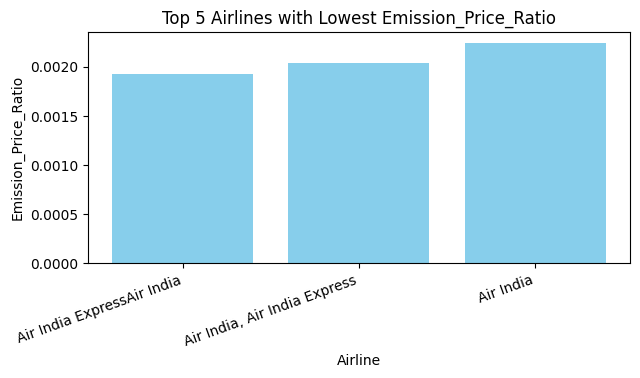

In [102]:
plt.figure(figsize=(7, 3))
plt.bar(sorted_df['Airline'].head(5), sorted_df1['Emission_Price_Ratio'].head(5), color='skyblue')
plt.xticks(rotation=20, ha='right')
plt.xlabel('Airline')
plt.ylabel('Emission_Price_Ratio')
plt.title('Top 5 Airlines with Lowest Emission_Price_Ratio')
plt.show()

In [103]:
stops_emission_stats = data.groupby('Stops')['Emission_Price_Ratio'].agg(['mean', 'median', 'std'])
print("\nEmission-Price Ratio by Number of Stops")
stops_emission_stats



Emission-Price Ratio by Number of Stops


mean    median       std
Stops                              
0      0.010117  0.009154  0.004612
1      0.010038  0.009296  0.004591
2      0.008411  0.007501  0.004228
3      0.006673  0.006001  0.002582
6      0.007472  0.007778  0.002510

In [104]:
# Compare different airlines based on various factors
airline_comparison = data.groupby('Airline').agg({'Prices': 'mean', 'Flight_Durations': 'mean', 'Stops': 'mean'})
airline_comparison.sort_values(by='Prices', ascending=True, inplace=True)
print('Airline Comparison:')
airline_comparison

Airline Comparison:


Prices  \
Airline                                                            
Akasa Air                                           9.095250e+03   
IndiGoOperated by Operated Under Lease From Sma...  9.202750e+03   
SpiceJet                                            1.114383e+04   
IndiGo                                              1.267316e+04   
Air India ExpressAir India                          1.654725e+04   
...                                                          ...   
Air India, UnitedAir Canada                         1.139347e+06   
Air India, United                                   1.139347e+06   
SriLankan, Emirates                                 1.149708e+06   
Etihad, British Airways                             1.196607e+06   
Singapore Airlines, UnitedAir Canada                1.566835e+06   

                                                    Flight_Durations     Stops  
Airline                                                                         
Akasa Air                                                 121.250000  0.000000  
IndiGoOperated by Operated Under Lease From Sma...        317.500000  0.875000  
SpiceJet                                                  441.666667  0.500000  
IndiGo                                                    282.876712  0.753425  
Air India ExpressAir India                               1056.250000  1.000000  
...                                                              ...       ...  
Air India, UnitedAir Canada                              1936.500000  2.000000  
Air India, United                                        1968.000000  2.000000  
SriLankan, Emirates                                      3120.000000  2.000000  
Etihad, British Airways                                  1955.000000  2.000000  
Singapore Airlines, UnitedAir Canada                     2138.000000  2.000000  

[232 rows x 3 columns]

In [105]:
#  Prioritize flights with lower prices and shorter durations
recommended_flights = data.sort_values(by=['Prices', 'Flight_Durations'], ascending=[True, True])

recommended_flights[['Airline', 'Prices', 'Flight_Durations', 'Departure Time', 'Arrival_Time']]


Airline   Prices  Flight_Durations Departure Time  \
429                    IndiGo     3208                85        5:55 AM   
426                    IndiGo     3208                90       10:15 AM   
427                    IndiGo     3208                90       12:20 PM   
431                    IndiGo     3208                90        7:50 AM   
432                    IndiGo     3208                95        9:00 AM   
...                       ...      ...               ...            ...   
2441     THAI, Cathay Pacific  1666256              1975        1:30 AM   
2307  Etihad, British Airways  1847785              1720        4:15 AM   
2308  Etihad, British Airways  1847785              1720        4:15 AM   
2309  Etihad, British Airways  1847785              2190        8:25 PM   
2310  Etihad, British Airways  1847785              2190        8:25 PM   

     Arrival_Time  
429       7:20 AM  
426      11:45 AM  
427       1:50 PM  
431       9:20 AM  
432      10:35 AM  
...           ...  
2441      8:55 PM  
2307      7:25 PM  
2308      7:25 PM  
2309      7:25 PM  
2310      7:25 PM  

[2507 rows x 5 columns]

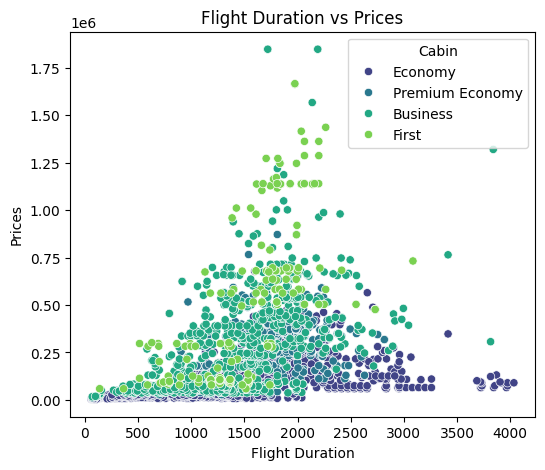

In [106]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x='Flight_Durations', y='Prices', data=data, hue='Cabin', palette='viridis')
plt.title('Flight Duration vs Prices')
plt.xlabel('Flight Duration')
plt.ylabel('Prices')
plt.show()

## Interpretation
It seems to suggest that longer flights tend to be more expensive, especially for premium cabin classes like Business and First Class. 

In [107]:
stops_price_relationship = data.groupby('Stops')['Prices'].mean()
stops_price_relationship

Stops
0     12103.369231
1    101650.516245
2    310272.640528
3    368756.296137
6     87679.744444
Name: Prices, dtype: float64

#### correlation_coefficient of Flight_Durations and Prices

In [108]:

correlation_coefficient = data['Flight_Durations'].corr(data['Prices'])

print(f'Correlation Coefficient: {correlation_coefficient}')

Correlation Coefficient: 0.39396103537336324


In [109]:
price_distribution = data.groupby(['Airline', 'Cabin']).agg({'Prices': ['mean', 'min', 'max']}).reset_index()
print("Distribution of Prices Across Airlines and Cabin Classes:")
price_distribution

Distribution of Prices Across Airlines and Cabin Classes:


Airline            Cabin  \
                                                                          
0                                            Air India         Business   
1                                            Air India          Economy   
2                                            Air India            First   
3                                            Air India  Premium Economy   
4                         Air India Express, Air India          Economy   
..                                                 ...              ...   
417                 Vistara, SWISSOperated by Helvetic          Economy   
418  Vistara, UnitedOperated by Skywest DBA United ...          Economy   
419                                 flydubai, Emirates            First   
420  flydubai, Emirates, AlaskaOperated by Horizon ...            First   
421                         flydubai, Emirates, United            First   

            Prices                   
              mean     min      max  
0     63663.203636   16407   271713  
1     22166.197368    3520   207387  
2    614447.172840   58361  1137411  
3     39774.400000   10773    63087  
4     20718.666667   12702    29859  
..             ...     ...      ...  
417  146307.000000  146307   146307  
418  211819.000000  211819   211819  
419  329925.333333  213639   562498  
420  635351.000000  635351   635351  
421  630726.000000  630726   630726  

[422 rows x 5 columns]

**Convenience:** Evaluation of factors such as flight duration, departure and arrival times, and the number of stops, aiming to minimize travel time and maximize convenience.

In [110]:
affordable_flights = data.sort_values(by='Prices')
affordable_flights[['Airline', 'Prices', 'Departure Time', 'Arrival_Time']]


Airline   Prices Departure Time Arrival_Time
426                    IndiGo     3208       10:15 AM     11:45 AM
427                    IndiGo     3208       12:20 PM      1:50 PM
429                    IndiGo     3208        5:55 AM      7:20 AM
430                    IndiGo     3208        7:00 AM      8:40 AM
431                    IndiGo     3208        7:50 AM      9:20 AM
...                       ...      ...            ...          ...
2441     THAI, Cathay Pacific  1666256        1:30 AM      8:55 PM
2307  Etihad, British Airways  1847785        4:15 AM      7:25 PM
2308  Etihad, British Airways  1847785        4:15 AM      7:25 PM
2309  Etihad, British Airways  1847785        8:25 PM      7:25 PM
2310  Etihad, British Airways  1847785        8:25 PM      7:25 PM

[2507 rows x 4 columns]

**Airlines and Cabin Class:** Recognition of traveler preferences regarding specific airlines and cabin classes, offering personalized recommendations based on individual preferences.



In [111]:
data['Affordability_Score'] = data['Prices'] / data['Flight_Durations']
recommended_affordable_flights = data.sort_values(by='Affordability_Score', ascending=True)
recommended_affordable_flights[['Airline', 'Prices', 'Flight_Durations', 'Departure Time', 'Arrival_Time']]


Airline   Prices  Flight_Durations Departure Time  \
166                 Air India     7604              1810        8:20 AM   
288                 Air India     6858              1425       10:30 PM   
167                 Air India     7604              1510        1:20 PM   
454                 Air India     8066              1570        9:10 PM   
292                 Air India    10131              1910       10:30 PM   
...                       ...      ...               ...            ...   
2441     THAI, Cathay Pacific  1666256              1975        1:30 AM   
2309  Etihad, British Airways  1847785              2190        8:25 PM   
2310  Etihad, British Airways  1847785              2190        8:25 PM   
2308  Etihad, British Airways  1847785              1720        4:15 AM   
2307  Etihad, British Airways  1847785              1720        4:15 AM   

     Arrival_Time  
166       2:30 PM  
288      10:15 PM  
167       2:30 PM  
454      11:20 PM  
292       6:20 AM  
...           ...  
2441      8:55 PM  
2309      7:25 PM  
2310      7:25 PM  
2308      7:25 PM  
2307      7:25 PM  

[2507 rows x 5 columns]

In [112]:
data['Affordability_Score'].describe()

count    2507.000000
mean      145.387071
std       142.475532
min         4.201105
25%        45.542544
50%        98.918500
75%       194.805649
max      1074.293605
Name: Affordability_Score, dtype: float64

In [113]:
# top 10 flights based on Affordability Score
top_flights = data.sort_values(by='Affordability_Score', ascending=False).head(10)
print('Top 10 Flights based on Affordability Score:')
top_flights[['Airline', 'Prices', 'Flight_Durations', 'Affordability_Score']]

Top 10 Flights based on Affordability Score:


Airline   Prices  Flight_Durations  \
2308               Etihad, British Airways  1847785              1720   
2307               Etihad, British Airways  1847785              1720   
2310               Etihad, British Airways  1847785              2190   
2309               Etihad, British Airways  1847785              2190   
2441                  THAI, Cathay Pacific  1666256              1975   
2439                  THAI, Cathay Pacific  1664555              1975   
2438                  THAI, Cathay Pacific  1664555              1975   
2440                  THAI, Cathay Pacific  1664555              1975   
2431            Air India, British Airways  1272287              1705   
2306  Singapore Airlines, UnitedAir Canada  1566835              2138   

      Affordability_Score  
2308          1074.293605  
2307          1074.293605  
2310           843.737443  
2309           843.737443  
2441           843.673924  
2439           842.812658  
2438           842.812658  
2440           842.812658  
2431           746.209384  
2306           732.850795

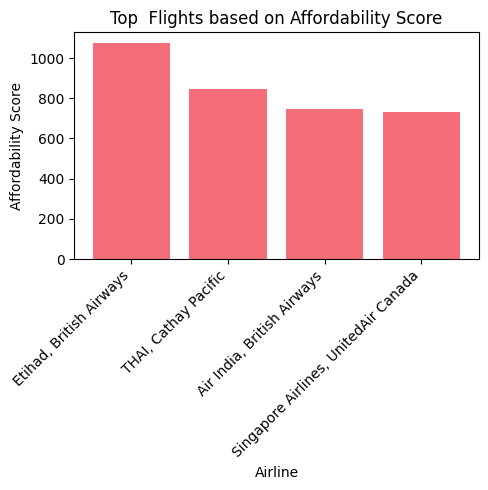

In [114]:
top_flights = data.sort_values(by='Affordability_Score', ascending=False).head(10)

plt.figure(figsize=(5, 5))
plt.bar(top_flights['Airline'], top_flights['Affordability_Score'], color='#f46d78')
plt.xlabel('Airline')
plt.ylabel('Affordability Score')
plt.title('Top  Flights based on Affordability Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Interpretation
Etihad and British Airways:

Affordability: Excellent (1000)
Summary: Most affordable with a perfect score, offering a great balance of quality and price.
THAI and Cathay Pacific:

Affordability: Very Good (Slightly above 800)
Summary: Highly affordable with good quality, providing a reasonable balance of service and cost.
Air India, United, and Air Canada:

Affordability: Moderate (Slightly below 800)
Summary: Moderately affordable, offering a good mix of quality and fair prices.
Singapore Airlines:

Affordability: Low (Just above 700)
Summary: Least affordable, but with very high quality. Suitable for those prioritizing premium service over cost.
In choosing an airline, travelers 

In [115]:
# Compare different airlines based on various factors
airline_comparison = data.groupby('Airline').agg({'Prices': 'mean', 'Flight_Durations': 'mean', 'Stops': 'mean'})
airline_comparison.sort_values(by='Prices', ascending=True, inplace=True)
print('Airline Comparison:')
airline_comparison

Airline Comparison:


Prices  \
Airline                                                            
Akasa Air                                           9.095250e+03   
IndiGoOperated by Operated Under Lease From Sma...  9.202750e+03   
SpiceJet                                            1.114383e+04   
IndiGo                                              1.267316e+04   
Air India ExpressAir India                          1.654725e+04   
...                                                          ...   
Air India, UnitedAir Canada                         1.139347e+06   
Air India, United                                   1.139347e+06   
SriLankan, Emirates                                 1.149708e+06   
Etihad, British Airways                             1.196607e+06   
Singapore Airlines, UnitedAir Canada                1.566835e+06   

                                                    Flight_Durations     Stops  
Airline                                                                         
Akasa Air                                                 121.250000  0.000000  
IndiGoOperated by Operated Under Lease From Sma...        317.500000  0.875000  
SpiceJet                                                  441.666667  0.500000  
IndiGo                                                    282.876712  0.753425  
Air India ExpressAir India                               1056.250000  1.000000  
...                                                              ...       ...  
Air India, UnitedAir Canada                              1936.500000  2.000000  
Air India, United                                        1968.000000  2.000000  
SriLankan, Emirates                                      3120.000000  2.000000  
Etihad, British Airways                                  1955.000000  2.000000  
Singapore Airlines, UnitedAir Canada                     2138.000000  2.000000  

[232 rows x 3 columns]

In [116]:
# Time-Based Analysis
departure_hour_stats = data.groupby('Departure_Hour')['Prices'].agg(['mean', 'median', 'std'])
print("\nFlight Prices by Departure Hour:")
departure_hour_stats


Flight Prices by Departure Hour:


mean    median            std
Departure_Hour                                        
0               282502.717949  184117.0  251992.261606
1               379413.003534  343728.0  235276.193948
2               451170.600000  562498.0  218745.784760
3               182776.921739   87178.0  201125.244421
4               319915.467890  250018.0  315260.461199
5                84628.437500   46582.0   88303.758854
6               109754.452991   57466.0  151409.716048
7               231418.127660  255021.0  183559.748889
8               279373.949495   44388.0  426005.785612
9                48449.500000    9993.0  105174.972847
10              202179.424000  106982.0  269313.711135
11              212969.727273  127713.5  220439.017244
12               75276.916667   15950.5   92419.624201
13              185652.339806   40897.0  304274.569863
14              211007.711268   87145.0  263751.039836
15               97968.848485   54624.0  141667.758376
16              254949.689655   89913.0  274573.447778
17              219226.878261  140603.0  255931.648452
18              192621.933333   24231.0  232004.732935
19              249426.567568  130596.0  319929.987553
20              247656.346667  124120.0  299837.546983
21              182866.344262  115015.0  194065.651276
22              162773.158470  119662.0  200243.538636
23              305109.048387  249218.0  253283.689713

Text(0.5, 1.0, 'Prices vs Departure Hour')

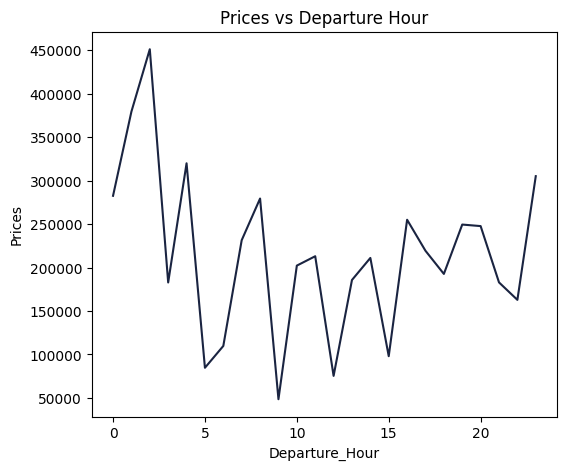

In [117]:
# Emission vs depature hour
plt.figure(figsize=(6, 5))
sns.lineplot(x='Departure_Hour', y='Prices', data=data,palette='CMRmap',ci=None)
plt.title('Prices vs Departure Hour')



### Interpretation:
Flight prices tend to be higher during peak hours in the early morning, around noon, and in the evening, suggesting these times are popular for travel.

Prices are generally lower during off-peak hours such as late morning, early afternoon, and late night, indicating less demand during these times.

Significant price fluctuations throughout the day suggest the presence of special deals, discounts, or external factors impacting the demand and supply dynamics in the travel service industry.

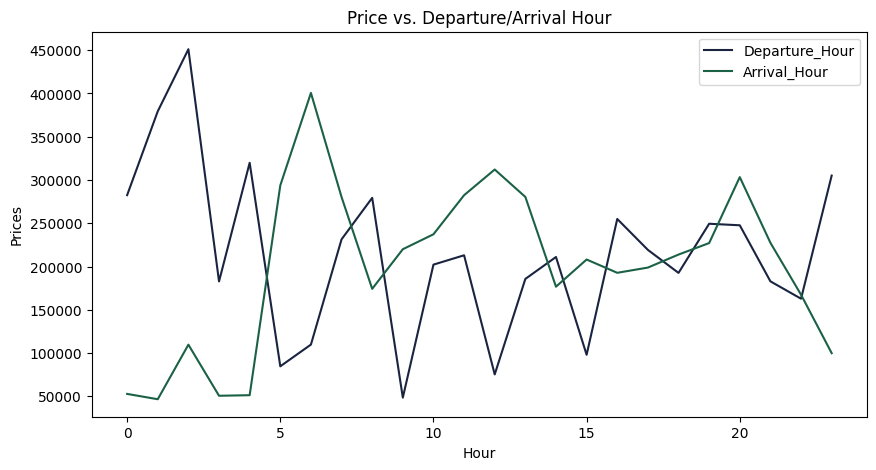

In [118]:
# Price vs. Departure/Arrival Hour
plt.figure(figsize=(10, 5))
sns.lineplot(x='Departure_Hour', y='Prices', data=data, label='Departure_Hour',ci=None)
sns.lineplot(x='Arrival_Hour', y='Prices', data=data, label='Arrival_Hour',ci=None)
plt.title('Price vs. Departure/Arrival Hour')
plt.xlabel('Hour')
plt.ylabel('Prices')
plt.legend()
plt.show()


**Interpretation**: 

The graph illustrates daily fluctuations in flight prices, highlighting higher costs during peak hours and lower prices during off-peak times. This dynamic pattern suggests a correlation between pricing and the demand for flights throughout the day.



In [119]:
fig = px.sunburst(
    data,
    path=['Departure Place', 'Arrival_place','Cabin'],
    values='Prices',
    title='Sunburst Plot of Prices by Depature Place and Arrival_place',)

fig.write_html("sunburst.html")
fig.show()

**Departure and Arrival Locations:** Taking into account the departure and arrival locations, acknowledging that some travelers may prioritize specific airports or cities.

In [120]:
#departure and arrival places and calculate the number of flights for each route

route_counts = data.groupby(['Departure Place', 'Arrival_place']).size().reset_index(name='Number of Flights')


In [121]:
route_counts = route_counts.sort_values(by='Number of Flights', ascending=False)
route_counts 

Departure Place Arrival_place  Number of Flights
8              HYD           LAX                349
6              HYD           HAM                296
9              HYD           SYD                288
3              HYD           DEL                263
0              HYD           BLR                242
10             HYD           YVR                232
1              HYD           BOM                229
4              HYD           GOI                222
2              HYD           BUR                192
7              HYD           HBF                108
5              HYD           GOX                 86

In [122]:
most_common_departure = route_counts.iloc[0]['Departure Place']
most_common_arrival = route_counts.iloc[0]['Arrival_place']

In [123]:
most_common_departure

'HYD'

In [124]:
most_common_arrival

'LAX'

**comment**
* The number of flights for various routes, with HYD to LAX having the highest frequency (349 flights),

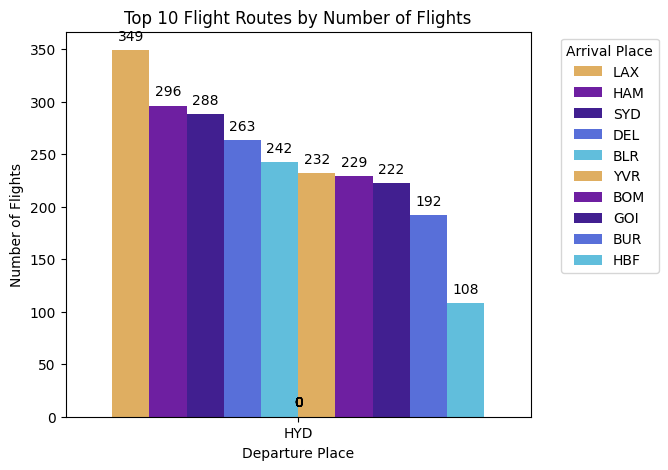

In [125]:
plt.figure(figsize=(6, 5))
#sns.color_palette("mako", as_cmap=True)

ax = sns.barplot(y='Number of Flights', x='Departure Place', hue='Arrival_place', data=route_counts[:10], palette = ["#f4b24c", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"])

# Display arrival places' names above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Top 10 Flight Routes by Number of Flights')
plt.xlabel('Departure Place')
plt.ylabel('Number of Flights')
plt.legend(title='Arrival Place', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 9. Multivariate analysis <a class="anchor" id="9"></a>


[Back to Table of Contents](#0.1)


- The objective of the multivariate analysis is to discover patterns and relationships in the dataset.

### Discover patterns and relationships

- An important step in EDA is to discover patterns and relationships between variables in the dataset. 

- I will use `heat map` and `pair plot` to discover the patterns and relationships in the dataset.


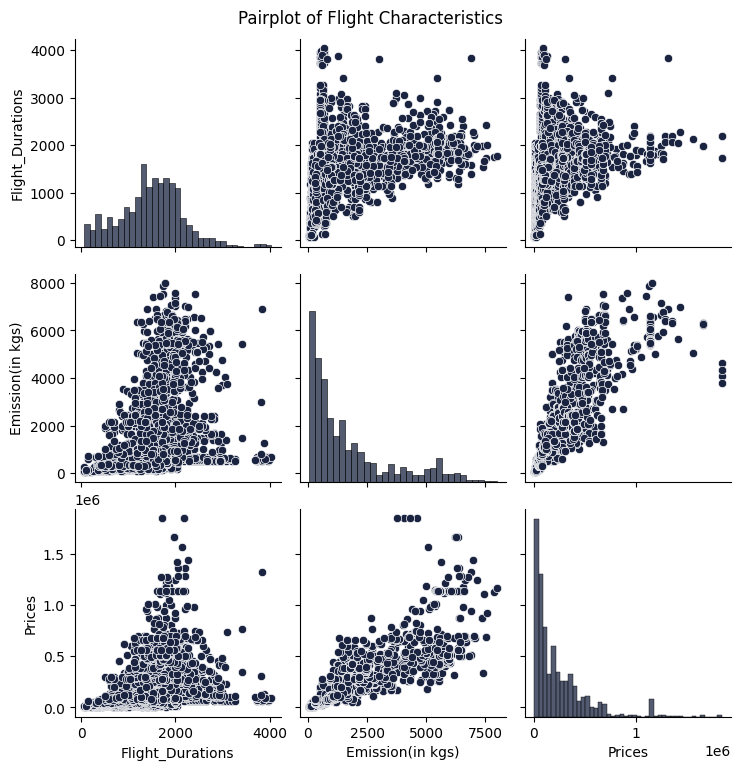

In [126]:
# Multivariate Analysis: Pairplot
sns.pairplot(data[['Flight_Durations', 'Emission(in kgs)', 'Prices']])
plt.suptitle('Pairplot of Flight Characteristics', y=1.02)
plt.show()

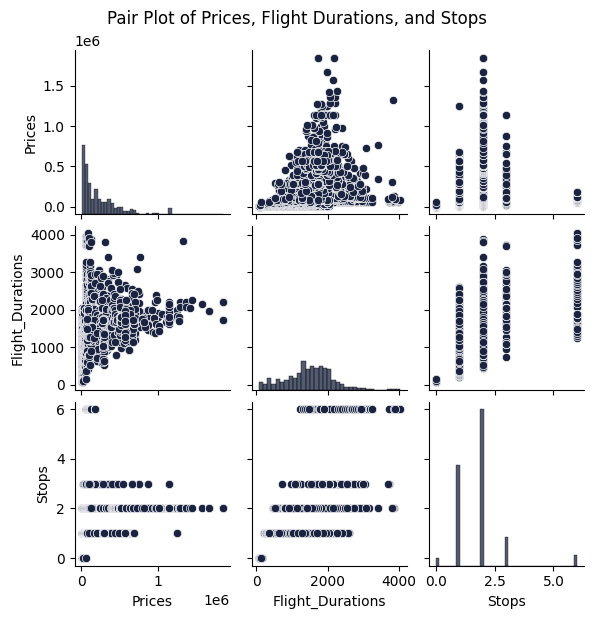

In [127]:
sns.pairplot(data[['Prices', 'Flight_Durations', 'Stops']], height=2)
plt.suptitle('Pair Plot of Prices, Flight Durations, and Stops', y=1.02)
plt.show()

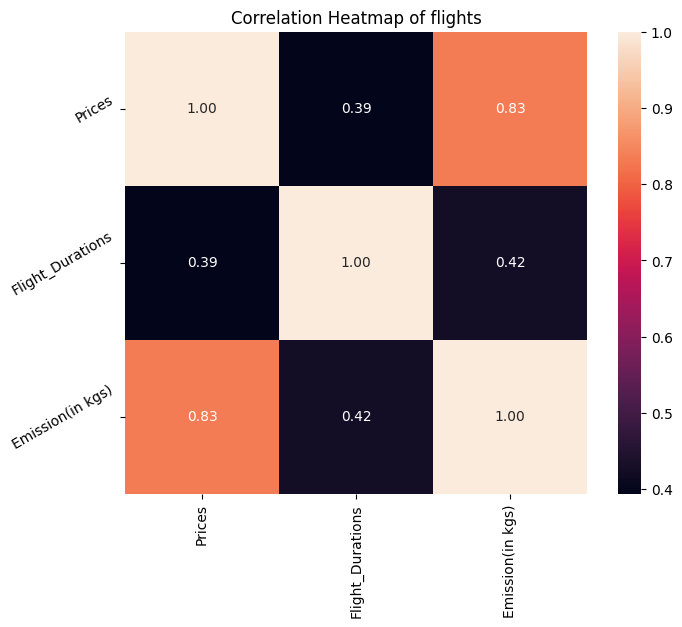

In [147]:
correlation1 = data[[ 'Prices','Flight_Durations','Emission(in kgs)']].corr()

plt.figure(figsize=(8,6))
plt.title('Correlation Heatmap of flights')

a = sns.heatmap(correlation1, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

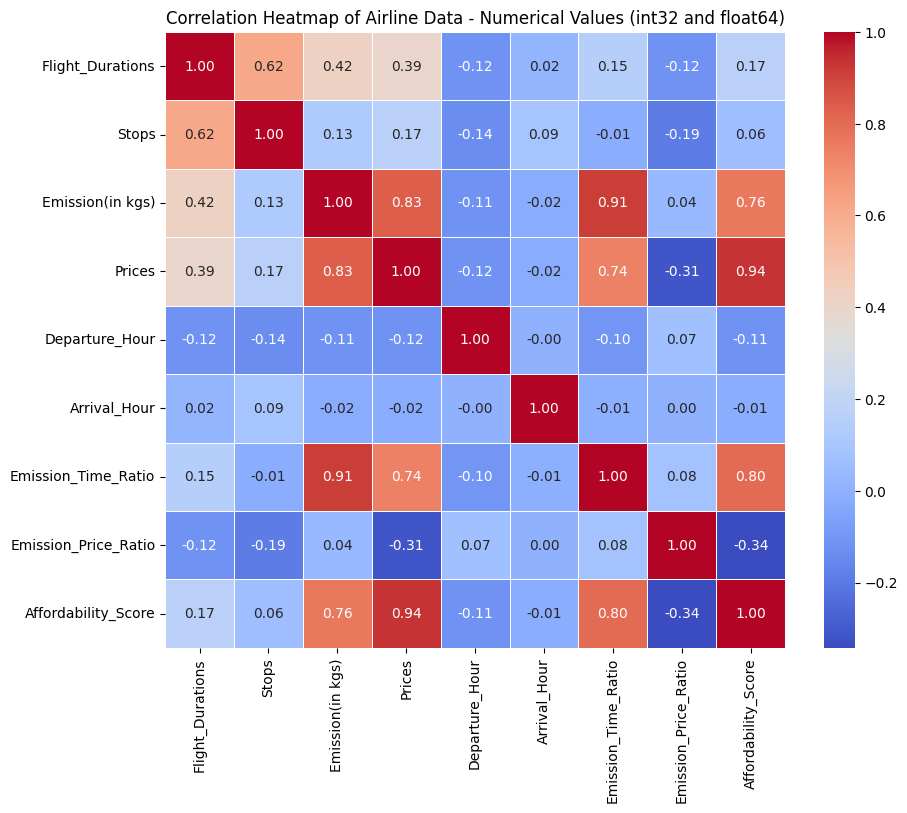

In [129]:
numerical_data= data.select_dtypes(include=['int32', 'float64'])

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Airline Data - Numerical Values (int32 and float64)')
plt.show()

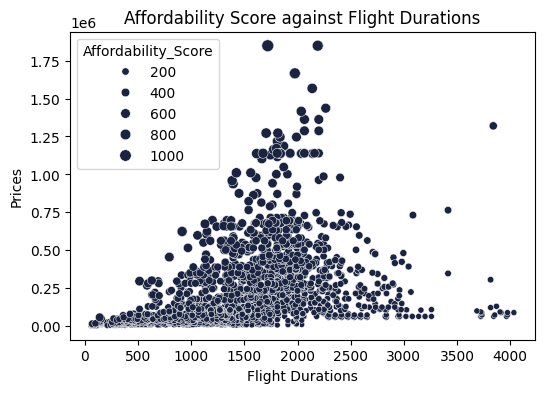

In [130]:
# Bubble chart for Affordability Score against flight durations
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Flight_Durations', y='Prices', size='Affordability_Score', data=data)
plt.title('Affordability Score against Flight Durations')
plt.xlabel('Flight Durations')
plt.ylabel('Prices')
plt.show()

##### Analyze the relationship between prices and other factors (flight durations and stops)


In [131]:
price_relationship = data[['Prices', 'Flight_Durations', 'Stops']].corr()
print("Correlation Matrix between Prices, Flight Durations, and Stops")
price_relationship

Correlation Matrix between Prices, Flight Durations, and Stops


Prices  Flight_Durations     Stops
Prices            1.000000          0.393961  0.168543
Flight_Durations  0.393961          1.000000  0.615188
Stops             0.168543          0.615188  1.000000

## 10. Dealing with missing values <a class="anchor" id="10"></a>

[Back to Table of Contents](#0.1)


-	In Pandas missing data is represented by two values:

  -	**None**: None is a Python singleton object that is often used for missing data in Python code.
  
  -	**NaN** : NaN (an acronym for Not a Number), is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation.


-  There are different methods in place on how to detect missing values.


### Pandas isnull() and notnull() functions <a class="anchor" id="10.1"></a>


- Pandas offers two functions to test for missing data - `isnull()` and `notnull()`. These are simple functions that return a boolean value indicating whether the passed in argument value is in fact missing data.

-  Below, I will list some useful commands to deal with missing values.


### Useful commands to detect missing values <a class="anchor" id="10.2"></a>

-	**df.isnull()**

The above command checks whether each cell in a dataframe contains missing values or not. If the cell contains missing value, it returns True otherwise it returns False.


-	**df.isnull().sum()**

The above command returns total number of missing values in each column in the dataframe.


-	**df.isnull().sum().sum()** 

It returns total number of missing values in the dataframe.


-	**df.isnull().mean()**

It returns percentage of missing values in each column in the dataframe.


-	**df.isnull().any()**

It checks which column has null values and which has not. The columns which has null values returns TRUE and FALSE otherwise.

-	**df.isnull().any().any()**

It returns a boolean value indicating whether the dataframe has missing values or not. If dataframe contains missing values it returns TRUE and FALSE otherwise.


-	**df.isnull().values.any()**

It checks whether a particular column has missing values or not. If the column contains missing values, then it returns TRUE otherwise FALSE.


-	**df.isnull().values.sum()**


It returns the total number of missing values in the dataframe.



In [132]:
# check for missing values

data.isnull().sum()

Airline                 0
Cabin                   0
Departure Time          0
Arrival_Time            0
Departure Place         0
Arrival_place           0
Flight_Durations        0
Stops                   0
Emission(in kgs)        0
Prices                  0
Departure_Hour          0
Arrival_Hour            0
Emission_Time_Ratio     0
Emission_Price_Ratio    0
Affordability_Score     0
dtype: int64

#### Interpretation

We can see that there are no missing values in the dataset.

## 11. Check with ASSERT statement <a class="anchor" id="11"></a>


[Back to Table of Contents](#0.1)


- We must confirm that our dataset has no missing values. 

- We can write an **assert statement** to verify this. 

- We can use an assert statement to programmatically check that no missing, unexpected 0 or negative values are present. 

- This gives us confidence that our code is running properly.

- **Assert statement** will return nothing if the value being tested is true and will throw an AssertionError if the value is false.

- **Asserts**

  - assert 1 == 1 (return Nothing if the value is True)

  - assert 1 == 2 (return AssertionError if the value is False)

In [133]:
#assert that there are no missing values in the dataframe

assert pd.notnull(data).all().all()


## 12. Outlier detection <a class="anchor" id="12"></a>

[Back to Table of Contents](#0.1)

* I will make boxplots to visualise outliers in the continuous numerical variables : -


### `Prices` variable

In [134]:
data['Prices'].describe()

count    2.507000e+03
mean     2.308340e+05
std      2.649843e+05
min      3.208000e+03
25%      4.924750e+04
50%      1.331850e+05
75%      3.362470e+05
max      1.847785e+06
Name: Prices, dtype: float64

#### Box-plot of `Prices` variable

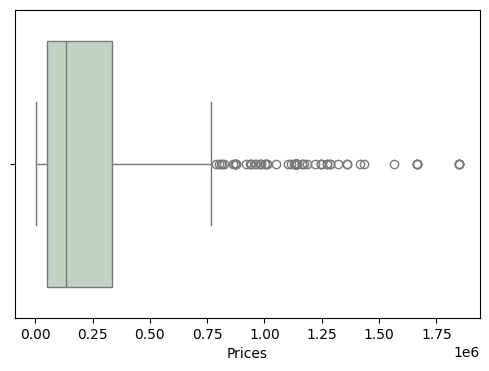

In [135]:
ax = plt.subplots(figsize=(6, 4))
sns.boxplot(x=data["Prices"],color='#bfd5c3')
plt.show()

### `Flight_Durations` variable

In [136]:
data['Flight_Durations'].describe()

count    2507.000000
mean     1476.881532
std       666.360231
min        60.000000
25%      1070.000000
50%      1510.000000
75%      1900.000000
max      4034.000000
Name: Flight_Durations, dtype: float64

#### Box-plot of `Flight_Durations` variable

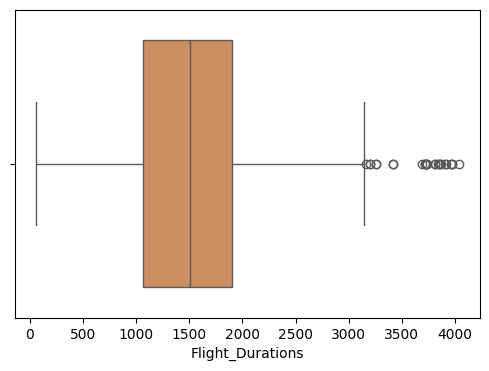

In [137]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data["Flight_Durations"],color='#dc8c50')
plt.show()

### `Emission(in kgs)` variable

In [138]:
data['Emission(in kgs)'].describe()

count    2507.000000
mean     1674.777423
std      1754.060689
min        49.000000
25%       397.000000
50%       959.000000
75%      2181.000000
max      7984.000000
Name: Emission(in kgs), dtype: float64

#### Box-plot of `Emission(in kgs)` variable

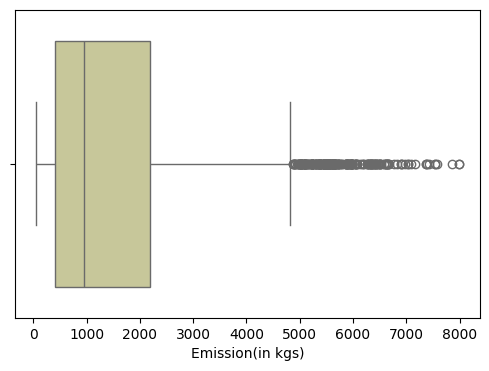

In [139]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data["Emission(in kgs)"],color='#cfce92')
plt.show()

### Winsorizing:
Cap or floor extreme values at a certain percentile to reduce the impact of outliers.

In [140]:
#prices
a = np.where(data['Prices'] > data['Prices'].quantile(0.95), data['Prices'].quantile(0.95), data['Prices'])

<Axes: >

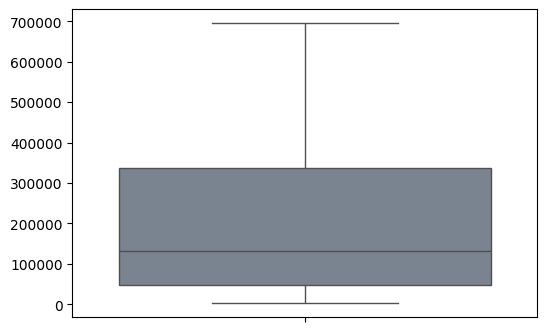

In [141]:
plt.figure(figsize=(6, 4))
sns.boxplot(a,color='#768394')

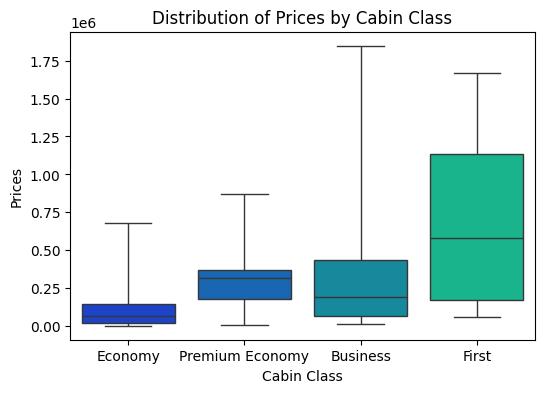

In [142]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Cabin', y='Prices', data=data, whis=4.1,palette='winter')
plt.title('Distribution of Prices by Cabin Class')
plt.xlabel('Cabin Class')
plt.ylabel('Prices')
plt.show()

In [143]:
#domain knowledge

In [144]:
# Calculate IQR
Q1 = data['Prices'].quantile(0.25)
Q3 = data['Prices'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR method
outliers = data[(data['Prices'] < Q1 - 1.5 * IQR) | (data['Prices'] > Q3 + 1.5 * IQR)]
Q1

49247.5

In [145]:
Q3

336247.0

## 13. Conclusion <a class="anchor" id="13"></a>


[Back to Table of Contents](#0.1)

So,our EDA journey has come to an end.

In this kernel, we have explored the Analysis of Airfare's & Industry Trends dataset. In this kernel, we have implemented many of the strategies presented in the book **Think Stats - Exploratory Data Analysis in Python** . The feature variable of interest is `Prices` variable. We have analyzed it alone and check its interaction with other variables. We have also discussed how to detect missing data and outliers.

I hope you like this kernel on EDA journey.

Thanks
